<a href="https://colab.research.google.com/github/DikshantPatel2210/Autoscout24-Car-Price-Prediction/blob/main/AutoScout24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline

from scipy import stats
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso , LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)
pd.options.display.float_format = "{:.3f}".format

In [ ]:
df0 = pd.read_csv("/content/final_scout_not_dummy.csv")

In [ ]:
df = df0.copy()

In [ ]:
df.head()

make_model body_type  price               vat        km  Type     Fuel  \
0    Audi A1    Sedans  15770    VAT deductible 56013.000  Used   Diesel   
1    Audi A1    Sedans  14500  Price negotiable 80000.000  Used  Benzine   
2    Audi A1    Sedans  14640    VAT deductible 83450.000  Used   Diesel   
3    Audi A1    Sedans  14500    VAT deductible 73000.000  Used   Diesel   
4    Audi A1    Sedans  16790    VAT deductible 16200.000  Used   Diesel   

   Gears                                Comfort_Convenience  \
0  7.000  Air conditioning,Armrest,Automatic climate con...   
1  7.000  Air conditioning,Automatic climate control,Hil...   
2  7.000  Air conditioning,Cruise control,Electrical sid...   
3  6.000  Air suspension,Armrest,Auxiliary heating,Elect...   
4  7.000  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security   age  Previous_Owners  \
0  ABS,Central door lock,Daytime running lights,D... 3.000            2.000   
1  ABS,Central door lock,Central door lock with r... 2.000            1.000   
2  ABS,Central door lock,Daytime running lights,D... 3.000            1.000   
3  ABS,Alarm system,Central door lock with remote... 3.000            1.000   
4  ABS,Central door lock,Driver-side airbag,Elect... 3.000            1.000   

    hp_kW  Inspection_new Paint_Type Upholstery_type Gearing_Type  \
0  66.000               1   Metallic           Cloth    Automatic   
1 141.000               0   Metallic           Cloth    Automatic   
2  85.000               0   Metallic           Cloth    Automatic   
3  66.000               0   Metallic           Cloth    Automatic   
4  66.000               1   Metallic           Cloth    Automatic   

   Displacement_cc  Weight_kg Drive_chain  cons_comb  
0         1422.000   1220.000       front      3.800  
1         1798.000   1255.000       front      5.600  
2         1598.000   1135.000       front      3.800  
3         1422.000   1195.000       front      3.800  
4         1422.000   1135.000       front      4.100

# Exploratory Data Analysis(EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [ ]:
df.describe().T

count      mean       std      min       25%       50%  \
price           15915.000 18024.381  7381.679 4950.000 12850.000 16900.000   
km              15915.000 32089.996 36977.215    0.000  1920.500 20413.000   
Gears           15915.000     5.937     0.705    5.000     5.000     6.000   
age             15915.000     1.390     1.121    0.000     0.000     1.000   
Previous_Owners 15915.000     1.043     0.339    0.000     1.000     1.000   
hp_kW           15915.000    88.499    26.674   40.000    66.000    85.000   
Inspection_new  15915.000     0.247     0.431    0.000     0.000     0.000   
Displacement_cc 15915.000  1428.662   275.804  890.000  1229.000  1461.000   
Weight_kg       15915.000  1337.701   199.682  840.000  1165.000  1295.000   
cons_comb       15915.000     4.832     0.868    3.000     4.100     4.800   

                      75%        max  
price           21900.000  74600.000  
km              46900.000 317000.000  
Gears               6.000      8.000  
age                 2.000      3.000  
Previous_Owners     1.000      4.000  
hp_kW             103.000    294.000  
Inspection_new      0.000      1.000  
Displacement_cc  1598.000   2967.000  
Weight_kg        1472.000   2471.000  
cons_comb           5.400      9.100

In [ ]:
df.describe(include = "object").T

count unique  \
make_model           15915      9   
body_type            15915      8   
vat                  15915      2   
Type                 15915      5   
Fuel                 15915      4   
Comfort_Convenience  15915   6196   
Entertainment_Media  15915    346   
Extras               15915    659   
Safety_Security      15915   4442   
Paint_Type           15915      3   
Upholstery_type      15915      2   
Gearing_Type         15915      3   
Drive_chain          15915      3   

                                                                   top   freq  
make_model                                                     Audi A3   3097  
body_type                                                       Sedans   8004  
vat                                                     VAT deductible  15044  
Type                                                              Used  11095  
Fuel                                                           Benzine   8548  
Comfort_Convenience  Air conditioning,Electrical side mirrors,Hill ...    388  
Entertainment_Media  Bluetooth,Hands-free equipment,On-board comput...   1737  
Extras                                                    Alloy wheels   5785  
Safety_Security      ABS,Central door lock,Daytime running lights,D...    729  
Paint_Type                                                    Metallic  15246  
Upholstery_type                                                  Cloth  12234  
Gearing_Type                                                    Manual   8149  
Drive_chain                                                      front  15707

# Handing Missing Values

In [ ]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

Detection of Duplicate

In [ ]:
duplicate_rows = df.duplicated()
duplicate_rows

0        False
1        False
2        False
3        False
4        False
         ...  
15910     True
15911    False
15912    False
15913     True
15914     True
Length: 15915, dtype: bool

In [ ]:
duplicate_counts = duplicate_rows.sum()
duplicate_counts

1673

In [ ]:
# Check for duplicate obervations in the data set and removes set

def duplicate_values(df) :
  print("Duplicate Check...")
  num_duplicates = df.duplicated(subset = None, keep = "first").sum()
  if num_duplicates > 0 :
    print("There are",num_duplicates,"duplcated observations in the dataset")
    df.drop_duplicates(keep = "first", inplace = True)
    print(num_duplicates, "duplicates were dropped!")
    print("No  more duplicate rows")

  else :
    print("There are no duplicated observations in the dataset")

In [ ]:
duplicate_values(df)

Duplicate Check...
There are 1673 duplcated observations in the dataset
1673 duplicates were dropped!
No  more duplicate rows


In [ ]:
df.describe().T

count      mean       std      min       25%       50%  \
price           14242.000 18100.969  7421.214 4950.000 12950.000 16950.000   
km              14242.000 32582.110 36856.863    0.000  3898.000 21000.000   
Gears           14242.000     5.940     0.703    5.000     5.000     6.000   
age             14242.000     1.415     1.110    0.000     0.000     1.000   
Previous_Owners 14242.000     1.041     0.337    0.000     1.000     1.000   
hp_kW           14242.000    88.713    26.548   40.000    66.000    85.000   
Inspection_new  14242.000     0.256     0.437    0.000     0.000     0.000   
Displacement_cc 14242.000  1432.890   277.507  890.000  1229.000  1461.000   
Weight_kg       14242.000  1342.399   201.247  840.000  1165.000  1320.000   
cons_comb       14242.000     4.825     0.862    3.000     4.100     4.800   

                      75%        max  
price           21900.000  74600.000  
km              47000.000 317000.000  
Gears               6.000      8.000  
age                 2.000      3.000  
Previous_Owners     1.000      4.000  
hp_kW             103.000    294.000  
Inspection_new      1.000      1.000  
Displacement_cc  1598.000   2967.000  
Weight_kg        1487.000   2471.000  
cons_comb           5.400      9.100

# Features Summary

In [ ]:
# !pip install ipywidgets ydata-profiling
#from ydata_profiling import ProfileReport
#profile = ProfileReport(df, title = "Profiling Report")
#profile.to_file("profiling_report.html")

In [ ]:
def Get_unique_values(df):
  output_data = []
  for col in df.columns:
    if df.loc[: , col].nunique() <= 10 :
      unique_values = df.loc[: , col].unique()
      output_data.append([col, df[col].nunique(), unique_values, df[col].dtype])
    else:
      #Otherwise, append only the columm name, number of unique values, and data type to the oput data
      output_data.append([col, df[col].nunique(), "-", df[col].dtype])

  output_df = pd.DataFrame(output_data, columns = ["Column Name", "Number of Unique Values", "Unique Values", "Data Type"])

  return output_df

In [ ]:
Get_unique_values(df)

Column Name  Number of Unique Values  \
0            make_model                        9   
1             body_type                        8   
2                 price                     2952   
3                   vat                        2   
4                    km                     6691   
5                  Type                        5   
6                  Fuel                        4   
7                 Gears                        4   
8   Comfort_Convenience                     6196   
9   Entertainment_Media                      346   
10               Extras                      659   
11      Safety_Security                     4442   
12                  age                        4   
13      Previous_Owners                        5   
14                hp_kW                       77   
15       Inspection_new                        2   
16           Paint_Type                        3   
17      Upholstery_type                        2   
18         Gearing_Type                        3   
19      Displacement_cc                       68   
20            Weight_kg                      432   
21          Drive_chain                        3   
22            cons_comb                       62   

                                        Unique Values Data Type  
0   [Audi A1, Audi A2, Audi A3, Opel Astra, Opel C...    object  
1   [Sedans, Station wagon, Compact, Coupe, Van, O...    object  
2                                                   -     int64  
3                  [VAT deductible, Price negotiable]    object  
4                                                   -   float64  
5   [Used, Employee's car, New, Demonstration, Pre...    object  
6                [Diesel, Benzine, LPG/CNG, Electric]    object  
7                                [7.0, 6.0, 5.0, 8.0]   float64  
8                                                   -    object  
9                                                   -    object  
10                                                  -    object  
11                                                  -    object  
12                               [3.0, 2.0, 1.0, 0.0]   float64  
13                          [2.0, 1.0, 0.0, 3.0, 4.0]   float64  
14                                                  -   float64  
15                                             [1, 0]     int64  
16                 [Metallic, Uni/basic, Perl effect]    object  
17                         [Cloth, Part/Full Leather]    object  
18                [Automatic, Manual, Semi-automatic]    object  
19                                                  -   float64  
20                                                  -   float64  
21                                 [front, 4WD, rear]    object  
22                                                  -   float64

In [ ]:
df["Weight_kg"].nunique()

432

In [ ]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

#Categorical Features

In [ ]:
df.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

[Text(0, 0, '2758'),
 Text(0, 0, '2417'),
 Text(0, 0, '2377'),
 Text(0, 0, '2305'),
 Text(0, 0, '1994'),
 Text(0, 0, '1486'),
 Text(0, 0, '884'),
 Text(0, 0, '20'),
 Text(0, 0, '1')]

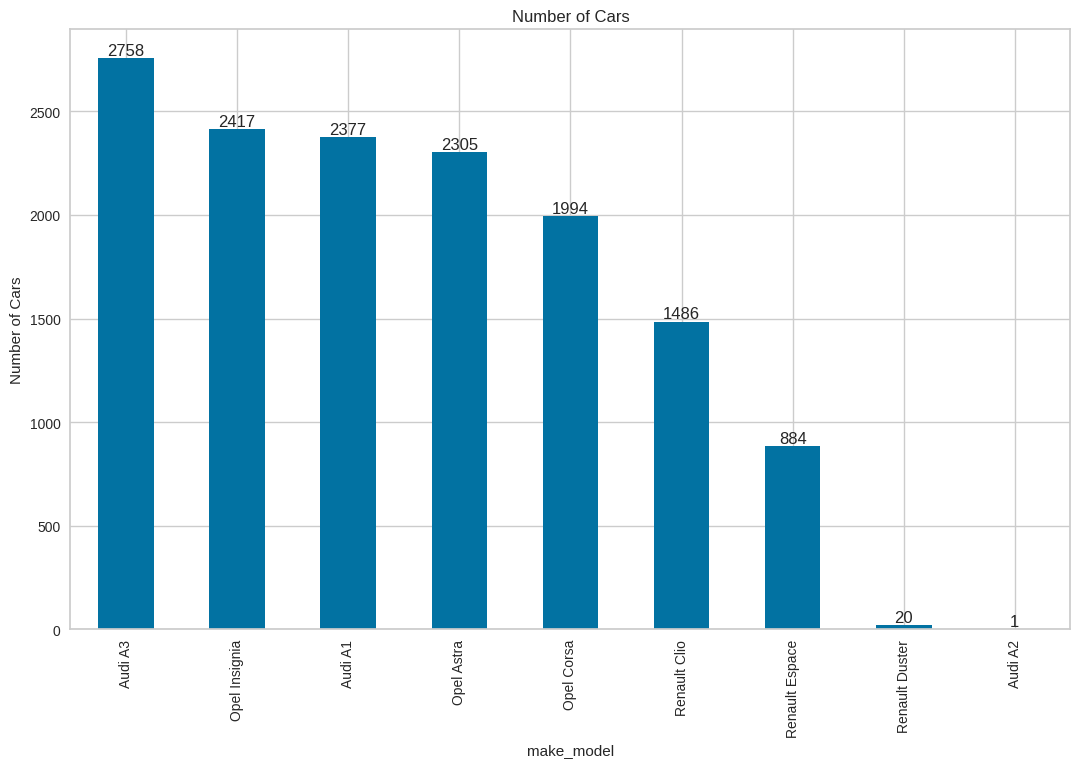

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df["make_model"].value_counts().sort_values(ascending= False)
counts.plot(kind = "bar")
plt.title("Number of Cars")
plt.xlabel("make_model")
plt.ylabel("Number of Cars")
plt.xticks(rotation = 90)
plt.bar_label(ax.containers[0], labels = counts.values, fontsize = 12)

In [ ]:
df[df.make_model == "Audi A2"]

make_model body_type  price             vat        km            Type  \
2614    Audi A2  Off-Road  28200  VAT deductible 26166.000  Employee's car   

        Fuel  Gears                                Comfort_Convenience  \
2614  Diesel  6.000  Air conditioning,Armrest,Automatic climate con...   

                                    Entertainment_Media        Extras  \
2614  Bluetooth,CD player,Hands-free equipment,MP3,O...  Alloy wheels   

                                        Safety_Security   age  \
2614  ABS,Adaptive Cruise Control,Central door lock,... 1.000   

      Previous_Owners  hp_kW  Inspection_new Paint_Type Upholstery_type  \
2614            1.000 85.000               0   Metallic           Cloth   

     Gearing_Type  Displacement_cc  Weight_kg Drive_chain  cons_comb  
2614       Manual         1598.000   1135.000       front      4.900

In [ ]:
df.drop(index = [2614], inplace = True)

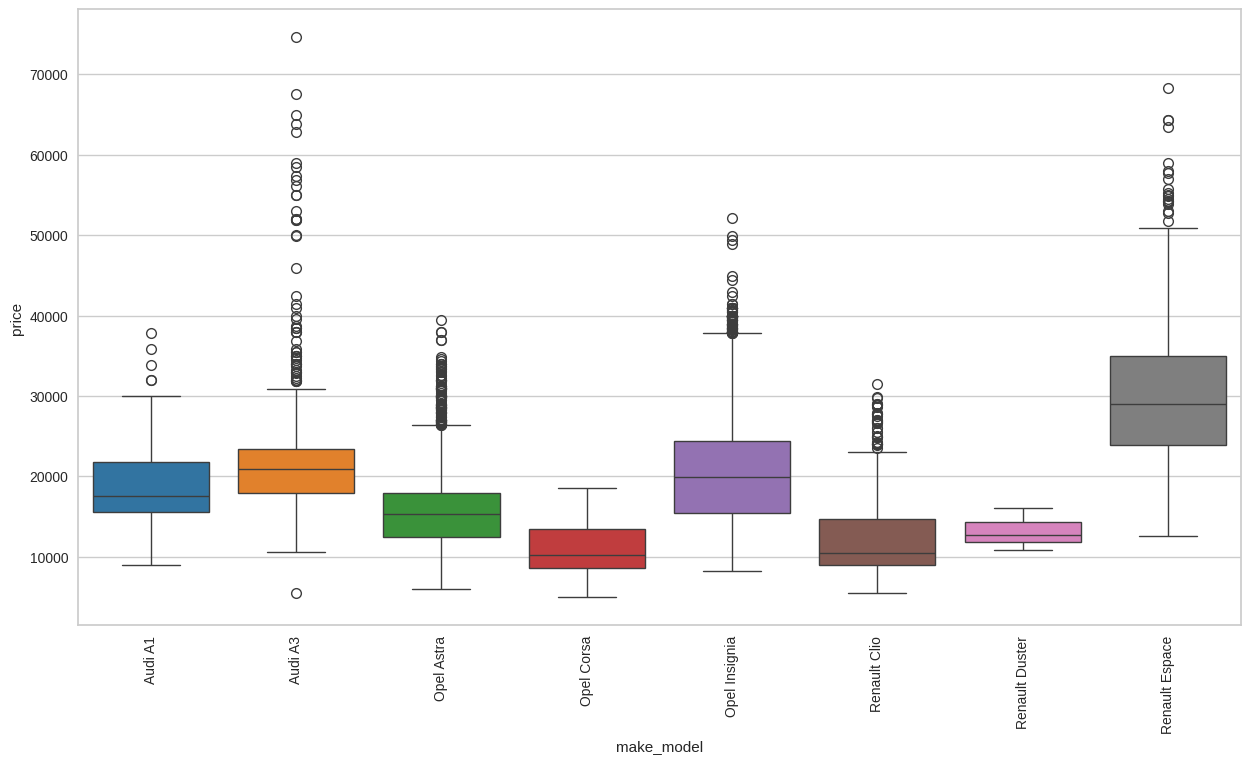

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x = "make_model", y = "price", data = df, palette = "tab10")
plt.xticks(rotation = 90);

# General Obeservations



*  Audi A1, Audi A3, Opel Insignia and Renault Espace models generally have higher price ranges.
*  Opel Corsa and Renault Clio models generally have lower price ranges.
*   The Renault Duster in underrepresented due to the small number of observations and it is therefore difficult  to assess their overall distribution.





In [ ]:
df.body_type.unique()

array(['Sedans', 'Station wagon', 'Compact', 'Coupe', 'Van',
       'Convertible', 'Off-Road', 'Transporter'], dtype=object)

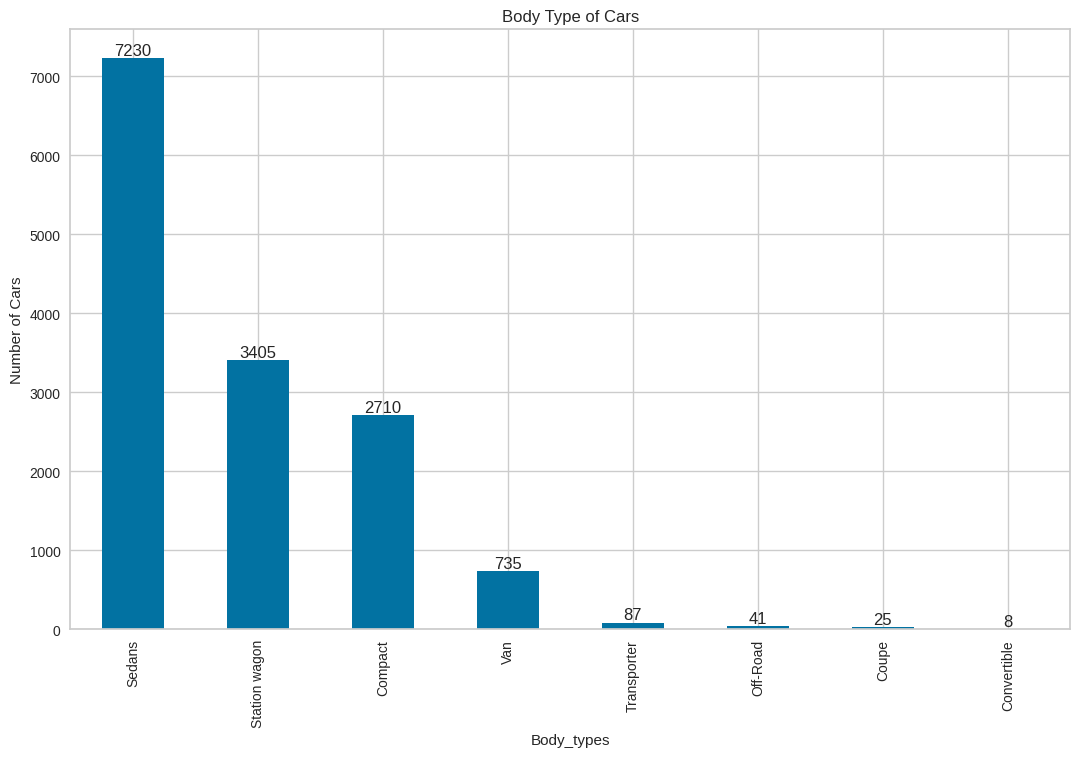

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.body_type.value_counts().sort_values(ascending= False)
counts.plot(kind = "bar")
plt.title("Body Type of Cars")
plt.xlabel("Body_types")
plt.ylabel("Number of Cars")
plt.xticks(rotation = 90)
plt.bar_label(ax.containers[0], labels = counts.values, fontsize = 12);

# General Evalution



* Sedans and Station wagon body types constitute the majority of vehicles in the dataset.
* Compact vehicles are also common, but not as much as Sedans and Station wagons.
*   Van, Transporters, and Off-Road vehicles are less common.
*   Couple and Convertible vehicles are quite rare.



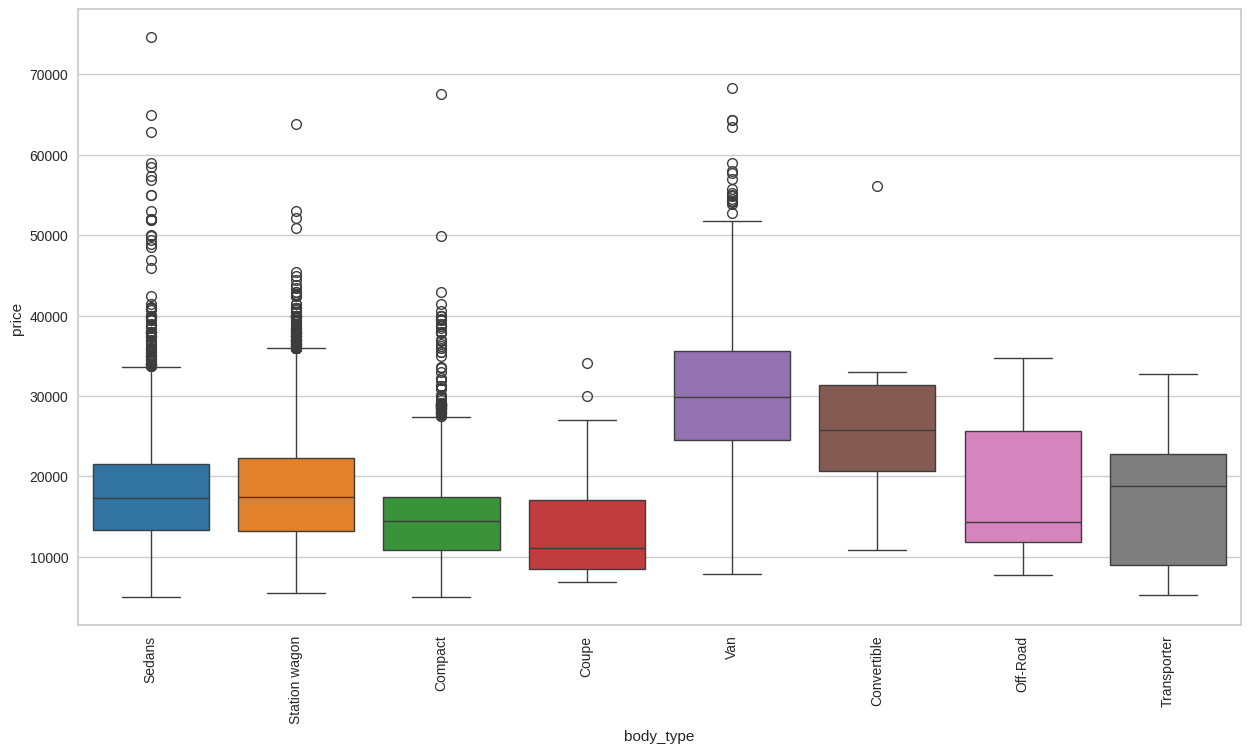

In [ ]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = "body_type", y = "price", data = df, palette = "tab10" )
plt.xticks(rotation = 90);

In [ ]:
#Recalculate the mean price by model and body type
mean_price_by_model_body_type = df.groupby(["make_model", "body_type"])["price"].mean().reset_index()


# Define custom color map
custom_colors = {
    "Sedans" :  "darkred",
    "Station wagon": "darkblue" ,
    "Compact" : "darkgreen" ,
    "Coupe" : "lightblue",
    "van" : "lightcyn",
}
# Assign colors to body types not listed in the custom color map
unique_body_types = mean_price_by_model_body_type["body_type"].unique()
for body_type in unique_body_types:
  if body_type not in custom_colors:
    custom_colors[body_type] = "lightblue"


#Create  a bar plot using plotly

fig = px.bar(mean_price_by_model_body_type, x = "price", y = "make_model", color = "body_type", orientation = "h", color_discrete_map = custom_colors, title = "Average Price by Model and Body Type", labels = {"price" : "Average Price", "makel_model" : "Model"}, height = 800)

fig.update_layout(title_font_size = 16, xaxis_title_font_size = 14, yaxis_title_font_size =14,
                  legend_title_font_size = 13, yaxis = {"categoryorder" :  "total ascending"})

fig.show()




General Evaluation



*   Convertible and Van Bidy types have higher price ranges compared to other body types.
*   Compact and Couple vehicles are concentrated in lower price ranges, indicating that these types of vehicles are generally more economical options.



In [ ]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [ ]:
df.vat.value_counts().sort_values(ascending = False)

vat
VAT deductible      13425
Price negotiable      816
Name: count, dtype: int64

In [ ]:
transmission_distr = df['vat'].value_counts().reset_index(name = "count")
transmission_distr.columns = ["vat", "count"]
fig = px.pie(transmission_distr, values = "count", names = "vat", title = "Vat Distribution")
fig.show()

In [ ]:
df.Type.value_counts().sort_values(ascending = False)

Type
Used              10172
New                1369
Pre-registered     1029
Employee's car      904
Demonstration       767
Name: count, dtype: int64

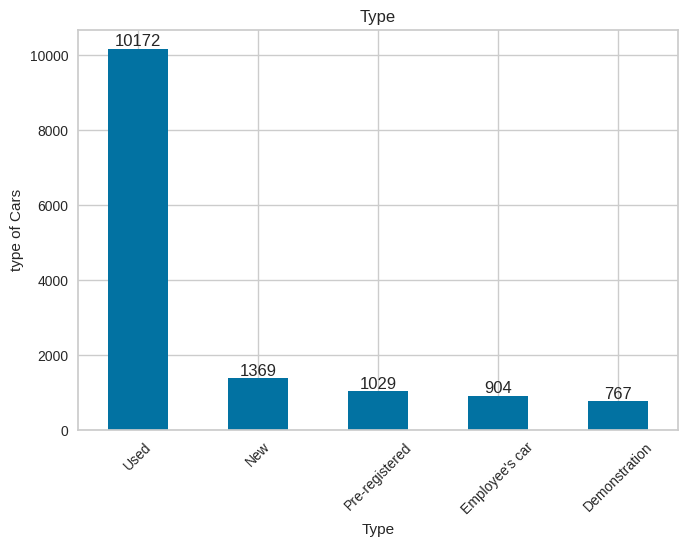

In [ ]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Type.value_counts().sort_values(ascending = False).head(20)
counts.plot(kind ='bar')
plt.title("Type")
plt.xlabel("Type")
plt.ylabel("type of Cars")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels= counts.values, fontsize= 12);

In [ ]:
counts1 = df.Type.value_counts().sort_values(ascending = False)

In [ ]:
counts1

Type
Used              10172
New                1369
Pre-registered     1029
Employee's car      904
Demonstration       767
Name: count, dtype: int64

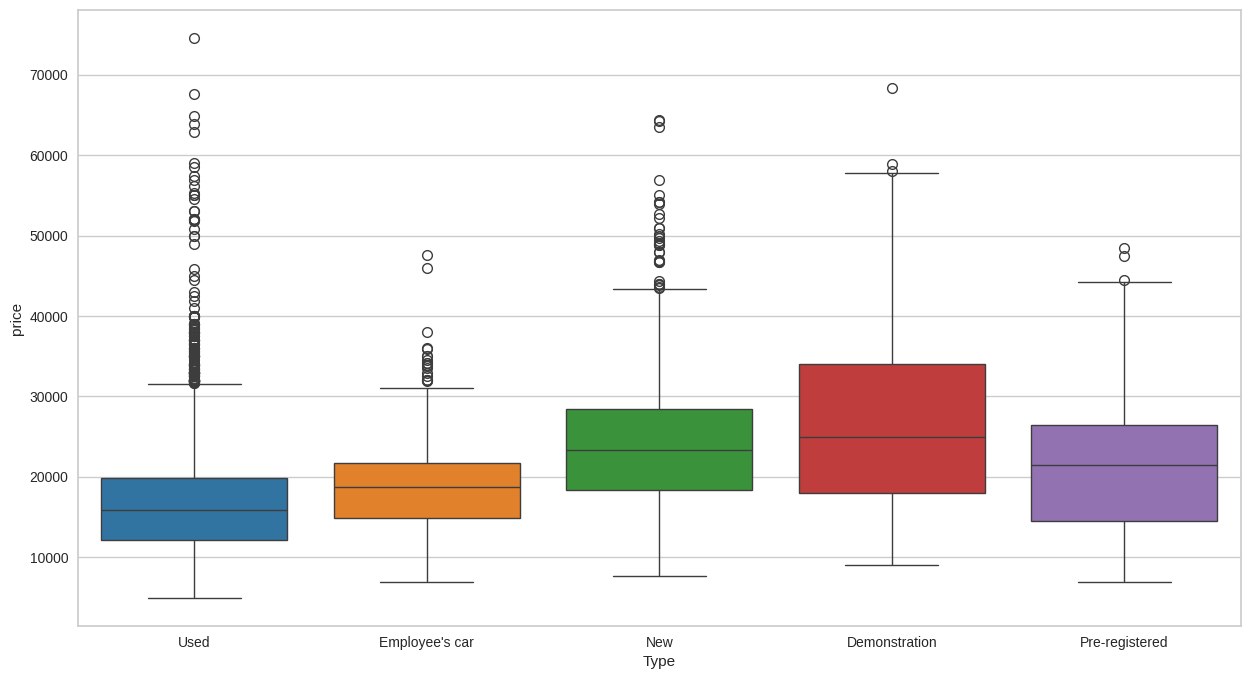

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x = "Type", y = "price", data = df , palette = "tab10" );

In [ ]:
df.Fuel.value_counts().sort_values(ascending = False)

Fuel
Benzine     7558
Diesel      6618
LPG/CNG       60
Electric       5
Name: count, dtype: int64

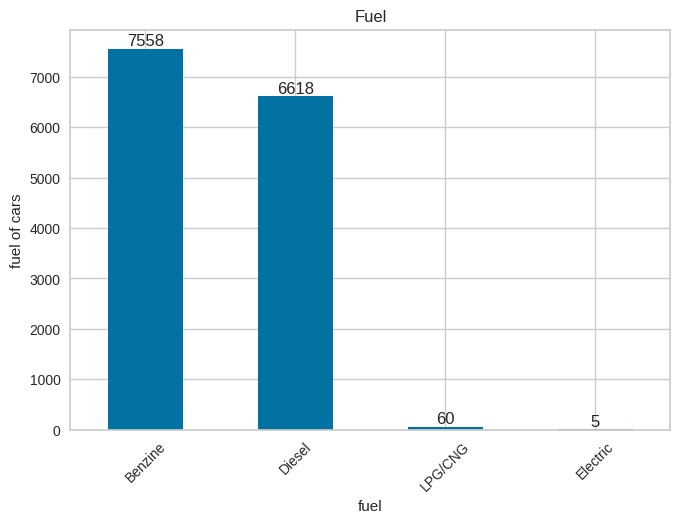

In [ ]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Fuel.value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title("Fuel")
plt.xlabel("fuel")
plt.ylabel("fuel of cars")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels= counts.values , fontsize = 12);

<Axes: xlabel='Fuel', ylabel='price'>

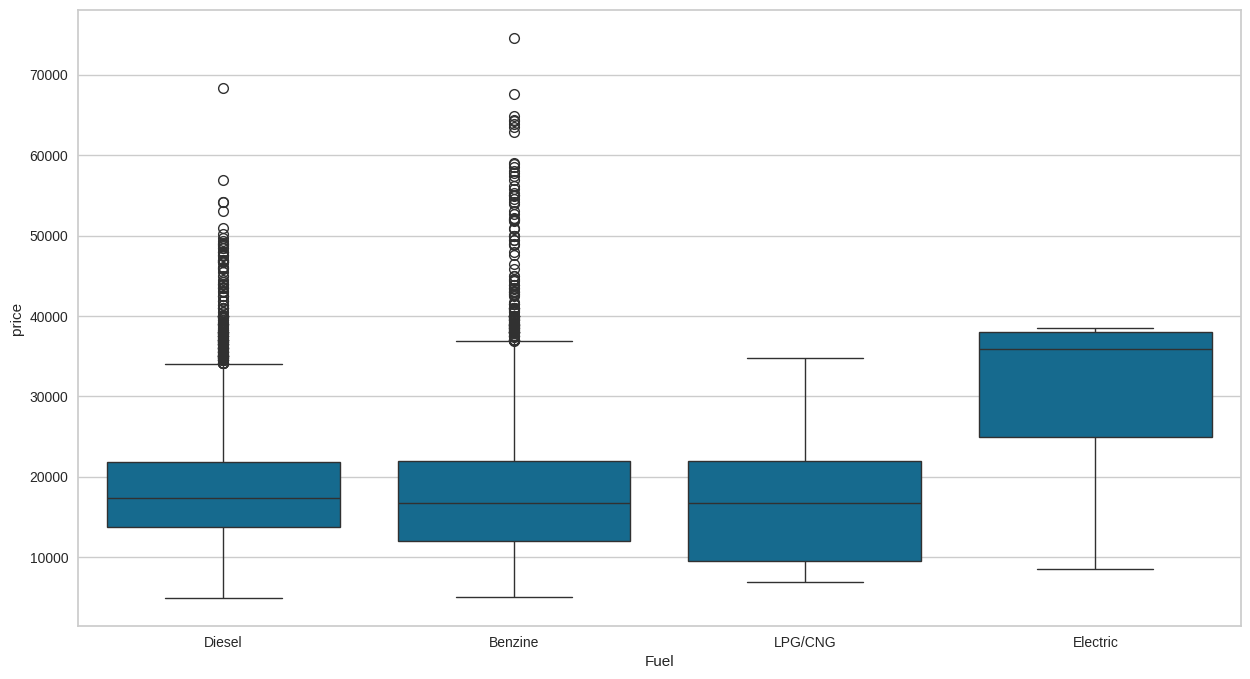

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x = "Fuel", y = "price", data = df)

In [ ]:
df[df["Fuel"]== "Electric"]

make_model body_type  price               vat        km  Type  \
3356        Audi A3   Compact  24950    VAT deductible 57000.000  Used   
3612        Audi A3    Sedans  38450  Price negotiable 13800.000  Used   
3615        Audi A3    Sedans  35899  Price negotiable 20880.000  Used   
3617        Audi A3    Sedans  38000  Price negotiable 12000.000  Used   
13393  Renault Clio    Sedans   8490    VAT deductible 23863.000  Used   

           Fuel  Gears                                Comfort_Convenience  \
3356   Electric  6.000  Air conditioning,Armrest,Automatic climate con...   
3612   Electric  6.000  Air conditioning,Armrest,Automatic climate con...   
3615   Electric  6.000  Air conditioning,Power windows,Seat ventilatio...   
3617   Electric  6.000  Air conditioning,Armrest,Automatic climate con...   
13393  Electric  6.000  Air conditioning,Cruise control,Navigation system   

                                     Entertainment_Media  \
3356   Bluetooth,CD player,Digital radio,Hands-free e...   
3612   Bluetooth,CD player,Digital radio,Hands-free e...   
3615                                     Bluetooth,Radio   
3617   Bluetooth,CD player,Digital radio,Hands-free e...   
13393                                  On-board computer   

                                                  Extras  \
3356   Alloy wheels,Roof rack,Sport package,Sport sea...   
3612   Alloy wheels,Sport package,Sport seats,Voice C...   
3615                                        Alloy wheels   
3617   Alloy wheels,Shift paddles,Sport package,Sport...   
13393                                       Alloy wheels   

                                         Safety_Security   age  \
3356   ABS,Adaptive Cruise Control,Adaptive headlight... 3.000   
3612   ABS,Adaptive Cruise Control,Alarm system,Centr... 1.000   
3615   ABS,Adaptive Cruise Control,Alarm system,Centr... 1.000   
3617   ABS,Adaptive Cruise Control,Adaptive headlight... 1.000   
13393                                 Driver-side airbag 3.000   

       Previous_Owners   hp_kW  Inspection_new Paint_Type    Upholstery_type  \
3356             1.000 150.000               0   Metallic  Part/Full Leather   
3612             1.000 110.000               0   Metallic              Cloth   
3615             1.000 110.000               0   Metallic              Cloth   
3617             1.000 110.000               0   Metallic  Part/Full Leather   
13393            1.000  55.000               0   Metallic  Part/Full Leather   

         Gearing_Type  Displacement_cc  Weight_kg Drive_chain  cons_comb  
3356   Semi-automatic         1400.000   1280.000       front      4.100  
3612   Semi-automatic         1395.000   1615.000       front      4.000  
3615   Semi-automatic         1395.000   1615.000       front      4.000  
3617   Semi-automatic         1395.000   1615.000       front      4.000  
13393       Automatic         1461.000   1165.000       front      5.000

In [ ]:
df.Gears.value_counts().sort_values(ascending = False)

Gears
6.000    7763
5.000    3771
7.000    2504
8.000     203
Name: count, dtype: int64

In [ ]:
df.age.value_counts().sort_values(ascending = False)

age
1.000    4282
0.000    3695
3.000    3342
2.000    2922
Name: count, dtype: int64

In [ ]:
transmission_distr = df["age"].value_counts().reset_index()
transmission_distr.columns = ["age", "count"]
fig = px.pie(transmission_distr, values='count', names='age')
fig.update_layout(title="Age Distribution")
fig.show()

In [ ]:
df.Previous_Owners.value_counts().sort_values(ascending=False)

Previous_Owners
1.000    12699
2.000     1014
0.000      497
3.000       29
4.000        2
Name: count, dtype: int64

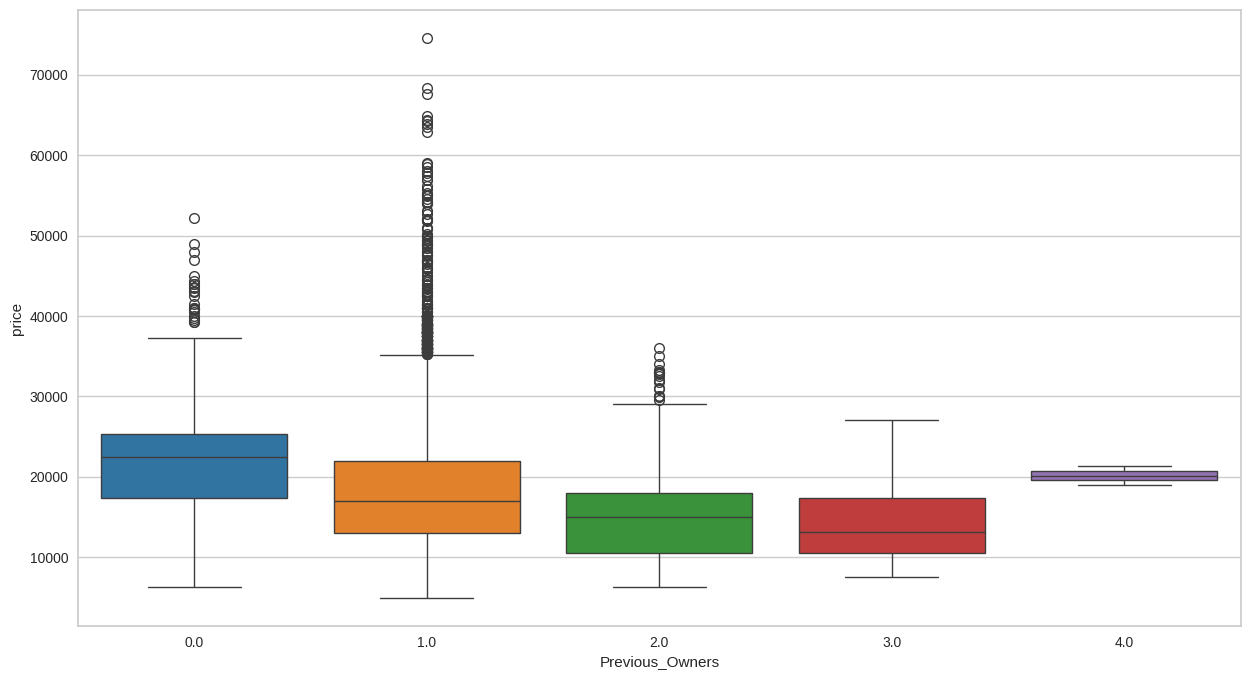

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x="Previous_Owners", y="price", data=df,  palette = "tab10");

In [ ]:
df.hp_kW.unique()

array([ 66., 141.,  85.,  70.,  92., 112.,  60.,  71.,  67., 110.,  93.,
       147.,  86., 140.,  87.,  81.,  82., 135., 132., 100.,  96., 162.,
       150., 294., 228., 270., 137., 133.,  77., 101.,  78., 103.,  74.,
       118.,  84.,  88.,  80.,  76., 149.,  51.,  44.,  55.,  52.,  63.,
        40.,  65.,  75., 125., 120., 184., 239., 121., 143., 191.,  89.,
       195., 127., 122., 154., 155., 104., 123., 146.,  90.,  56.,  53.,
        54., 164., 163.,  57., 119., 165., 117., 115.,  98., 168., 167.])

In [ ]:
fig = px.scatter(df, x = "hp_kW", y = "price", color = "make_model",
                 title = "Scatter Plot of HorsePower (kW) vs Price",
                 labels = {"hp_kW" : "Horsepower (kW)" ,"price" : "Price"},
                 hover_data = ["make_model"])

#Enhanceing the Layout

fig.update_layout(title_font_size = 16, xaxis_title_font_size = 14, yaxis_title_font_size = 14,
                  legend_title_text = "Make & Model")

# Showing the interactive plot
fig.show()

## General Evalution


*  Positive Correlation Between Horsepower and Price:

The graph generally shows that as horsepower increase, the price also inceases. This indicates that higher performance are more expensive.


*   Distribution by Model and Brand:

Different colors represent different brands and models. There can be significant differences in price among different brads and models with the same horsepower. For axample, luxury, brands(such as Audi, BMW) generally have higher prices, while more econimical brands (such as Opel, Renault)have lower prices.

*   Outliers:

Some brands and models deviate from general trend, having higher or lower prices. These outliers may be due to special equipment packages or rare models.


In [ ]:
df.Inspection_new.value_counts().sort_values(ascending = False)

Inspection_new
0    10591
1     3650
Name: count, dtype: int64

In [ ]:
df.Paint_Type.value_counts(ascending = False)


Paint_Type
Metallic       13681
Uni/basic        549
Perl effect       11
Name: count, dtype: int64

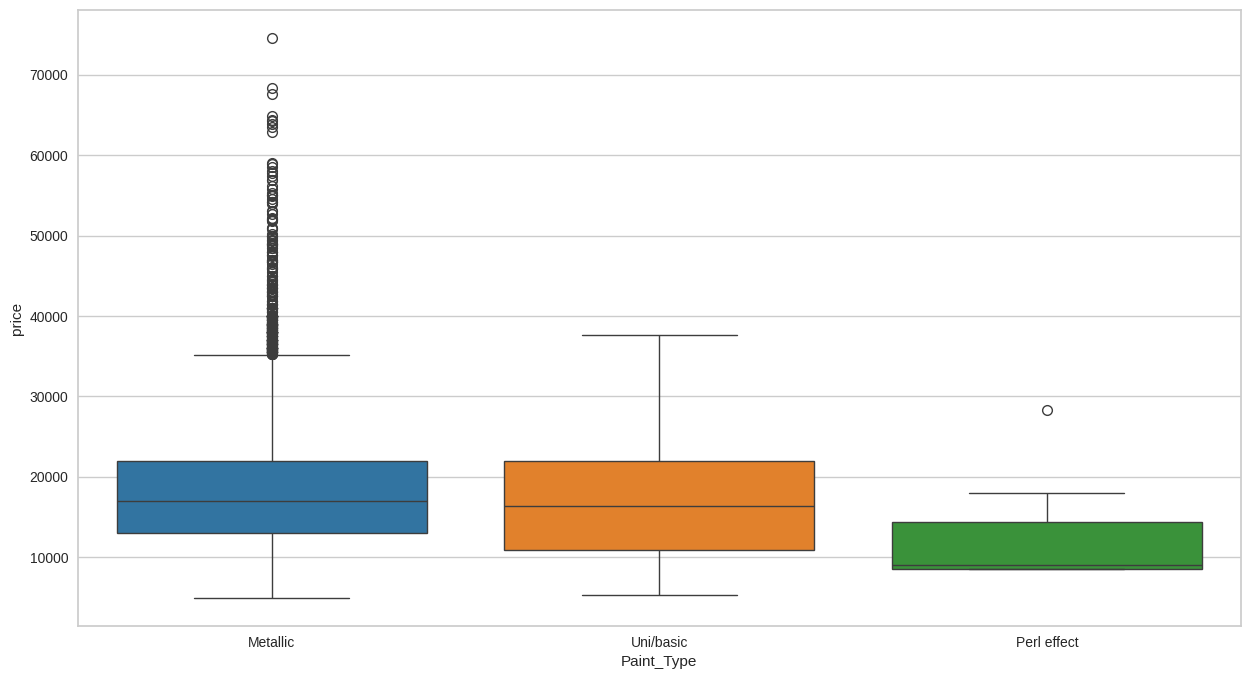

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x = "Paint_Type", y = "price", data = df , palette = "tab10");

## General Evalution



*   This graph helps us understand the impact of paint type on car prices. Metallic and Uni/Basic painted cars are generally solf at higher prices, with metallic painted cars having many outliers at very high prices. Perl Effect painted cars, on the other hand, are generally sold at lower prices


In [ ]:
df.Upholstery_type.value_counts().sort_values(ascending = False)

Upholstery_type
Cloth                10917
Part/Full Leather     3324
Name: count, dtype: int64

In [ ]:
transmission_distr = df['Upholstery_type'].value_counts().reset_index()
transmission_distr.columns = ['Upholstery_type', 'count']
fig = px.pie(transmission_distr, values='count', names='Upholstery_type')
fig.update_layout(title="Upholstery_type Distribution")
fig.show()


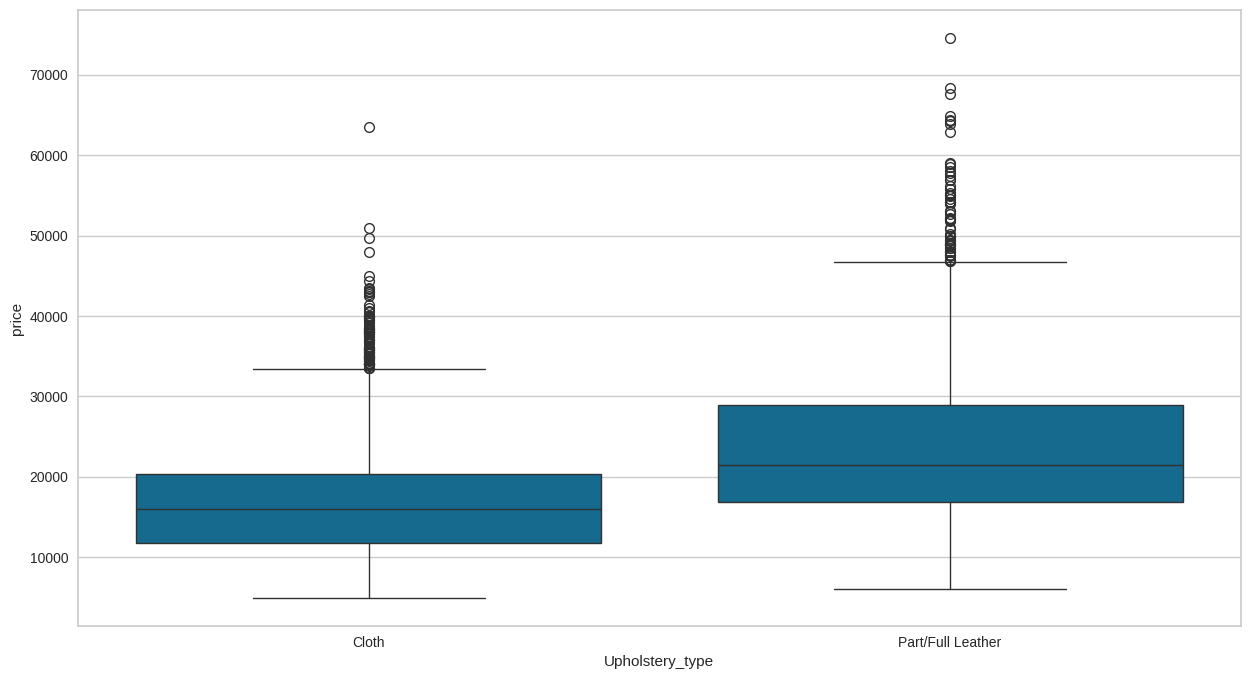

In [ ]:

plt.figure(figsize = (15,8))
sns.boxplot(x="Upholstery_type", y="price", data=df);

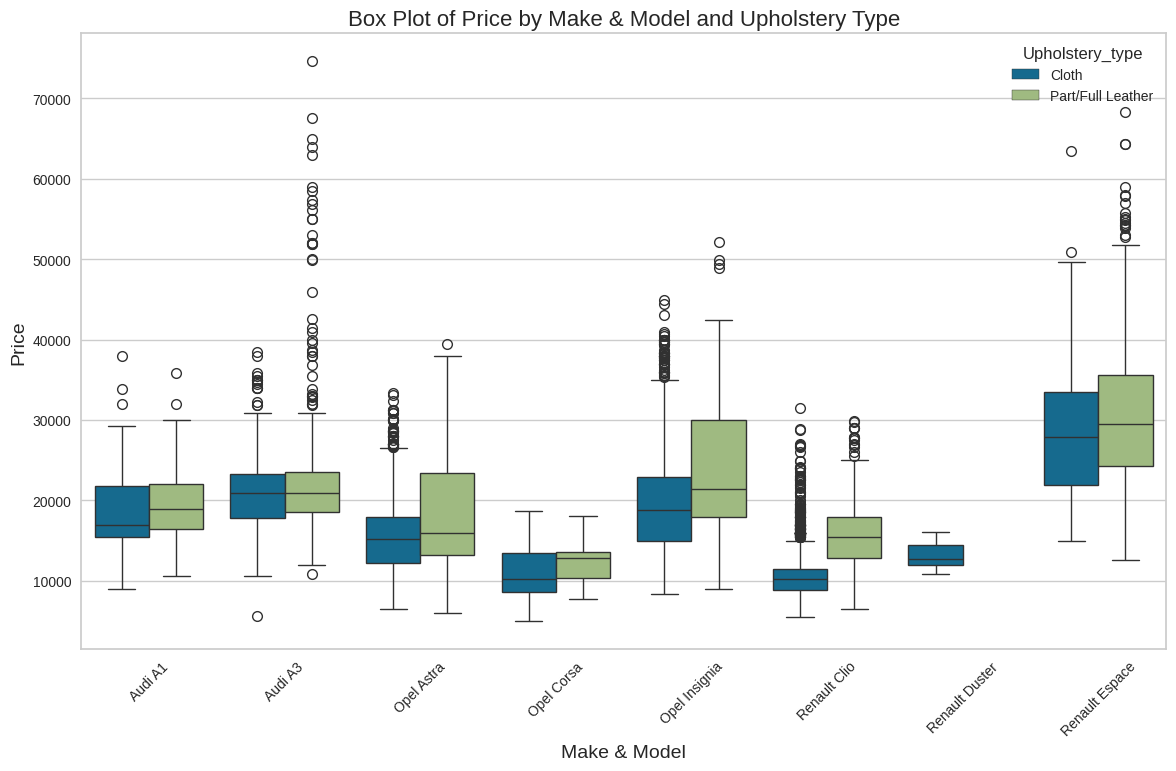

In [ ]:
plt.figure(figsize=(14, 8))

sns.boxplot(x='make_model', y='price', hue='Upholstery_type', data=df)

plt.title('Box Plot of Price by Make & Model and Upholstery Type', fontsize=16)
plt.xlabel('Make & Model', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.show()

#General Evalution:



Median Prices: The median price
of vehicles with leather upholstery is higher than the median price of vehicles with cloth upholstery.

Price Distribution: Vehicles with leather upholstery are generally sold at higher prices. The price range for leather-upholstered vehicles is wider and includes outliers with higher prices.

Outliers: Both types of upholstery have outliers, but vehicles with leather upholstery have outliers with higher prices.



In [ ]:
df.Gearing_Type.value_counts().sort_values(ascending=False)

Gearing_Type
Manual            7231
Automatic         6546
Semi-automatic     464
Name: count, dtype: int64

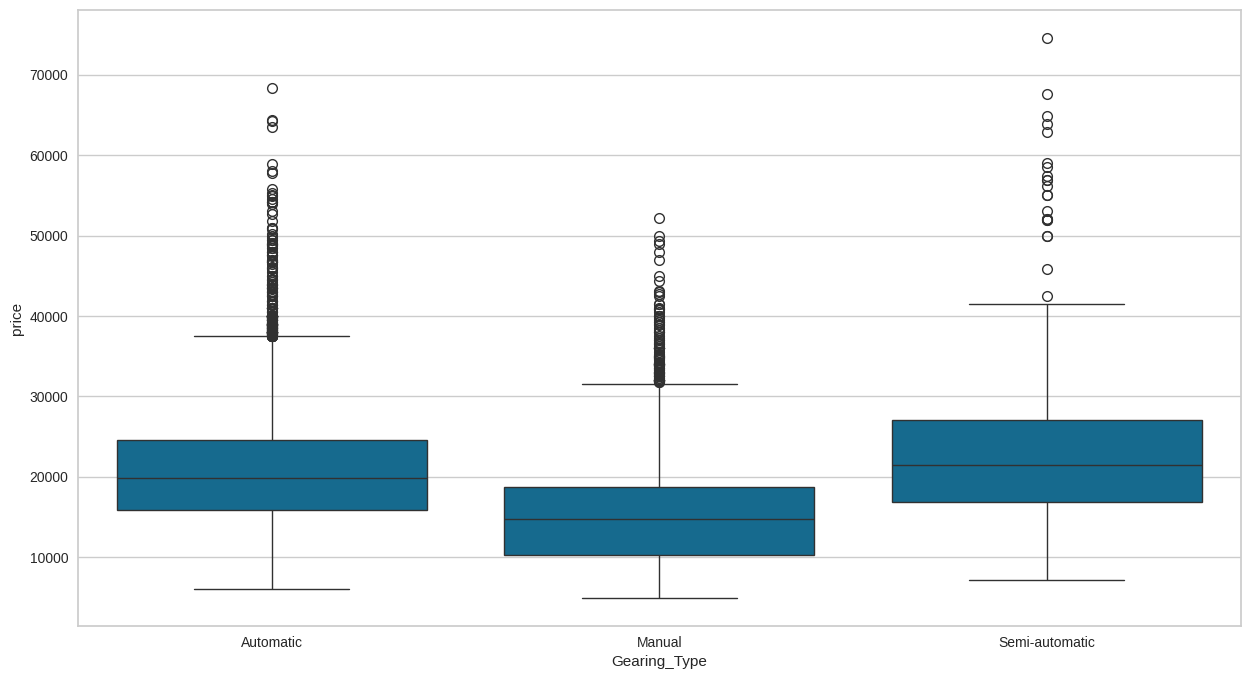

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x="Gearing_Type", y="price", data=df);

In [ ]:
df.Drive_chain.value_counts().sort_values(ascending=False)

Drive_chain
front    14066
4WD        171
rear         4
Name: count, dtype: int64

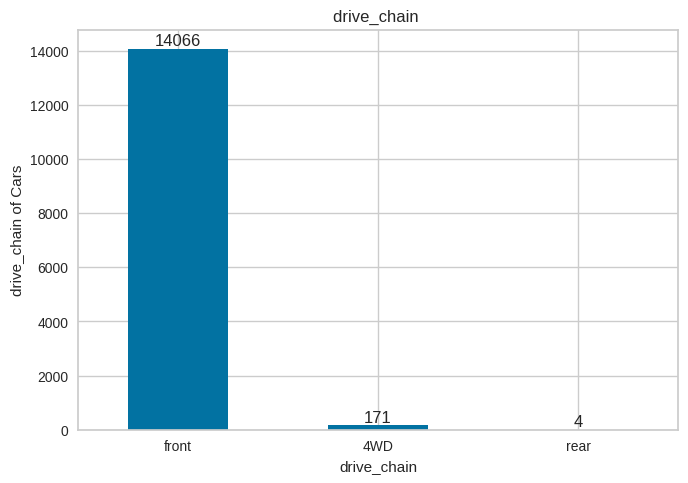

In [ ]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Drive_chain.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('drive_chain ')
plt.xlabel('drive_chain')
plt.ylabel('drive_chain of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

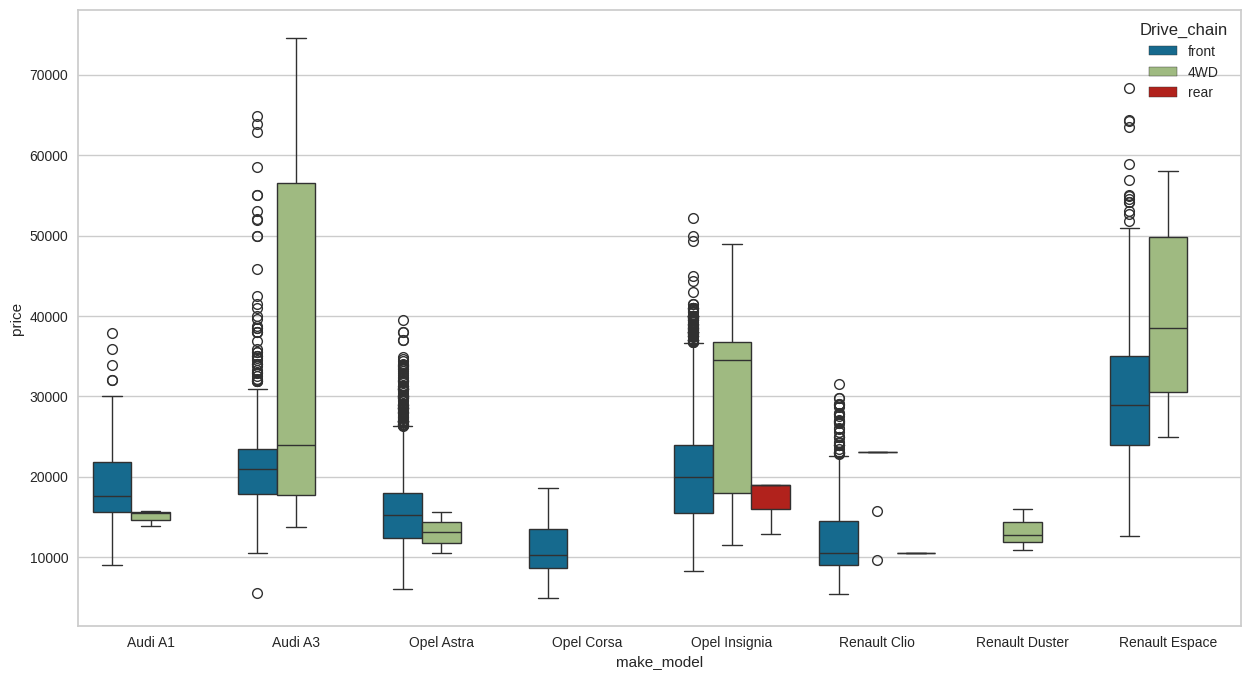

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x="make_model", y="price", hue = "Drive_chain", data=df);

General Evaluation:

Front-Wheel Drive (Front): This is the most common type of drive chain and has a wide price range. Outliers are generally found at higher prices.

Four-Wheel Drive (4WD): This is moderately common and generally has higher prices. The price range is wide, and outliers are found at high prices.

Rear-Wheel Drive (Rear): This is the least common type of drive chain and has lower prices. There are no outliers.

# Numerical Features

In [ ]:
df.km.unique()

array([5.6013e+04, 8.0000e+04, 8.3450e+04, ..., 2.8640e+03, 1.5060e+03,
       5.7000e+01])

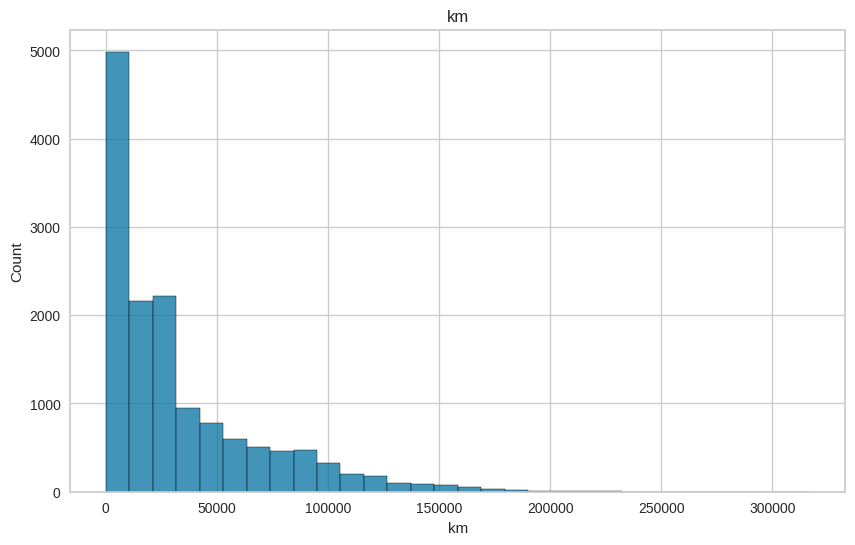

In [ ]:
sns.histplot(data = df , x = "km", bins = 30)
plt.title("km");


General Evaluation:

New and Lightly Used Cars: In most models, new (0-10k km) and lightly used (10k-50k km) cars are the most common. This indicates that the market has more new or lightly used cars available.

Moderately Used Cars: Moderately used cars (50k-100k km) are less common in most models.

High Mileage Cars: High mileage cars (>100k km) are quite rare in most models.

Right Skewness: This graph helps us understand the mileage status of cars in different models.

Generally, low mileage cars are more prevalent, indicating a right-skewed distribution.


In [ ]:
df.Displacement_cc.unique()

array([1422., 1798., 1598.,  999., 1395.,  929., 1596., 1600., 1000.,
       1984., 1498., 1197.,  995.,  998., 1968., 1400., 2000., 1568.,
       1896., 2480., 1499., 1495., 1398., 1584.,  997., 1399., 1364.,
       1490.,  996., 1696., 1686., 1396., 1368., 1397., 1248., 1229.,
       1300., 1200.,  973., 1239., 1350., 1369., 1390., 1198., 1195.,
       1956., 1998., 2967., 1856., 1500., 1496., 1533., 1599., 1995.,
       1461., 1618., 1149., 1199.,  898.,  890.,  900., 1100., 1333.,
        899., 1589., 1580., 1997., 1800.])

Text(0.5, 1.0, 'Displacement_cc')

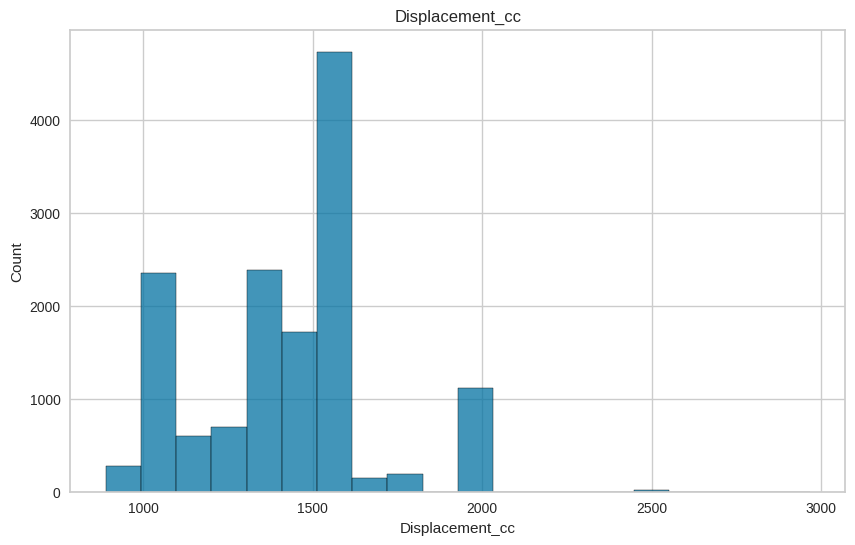

In [ ]:
sns.histplot(data= df, x = "Displacement_cc", bins = 20)
plt.title("Displacement_cc")

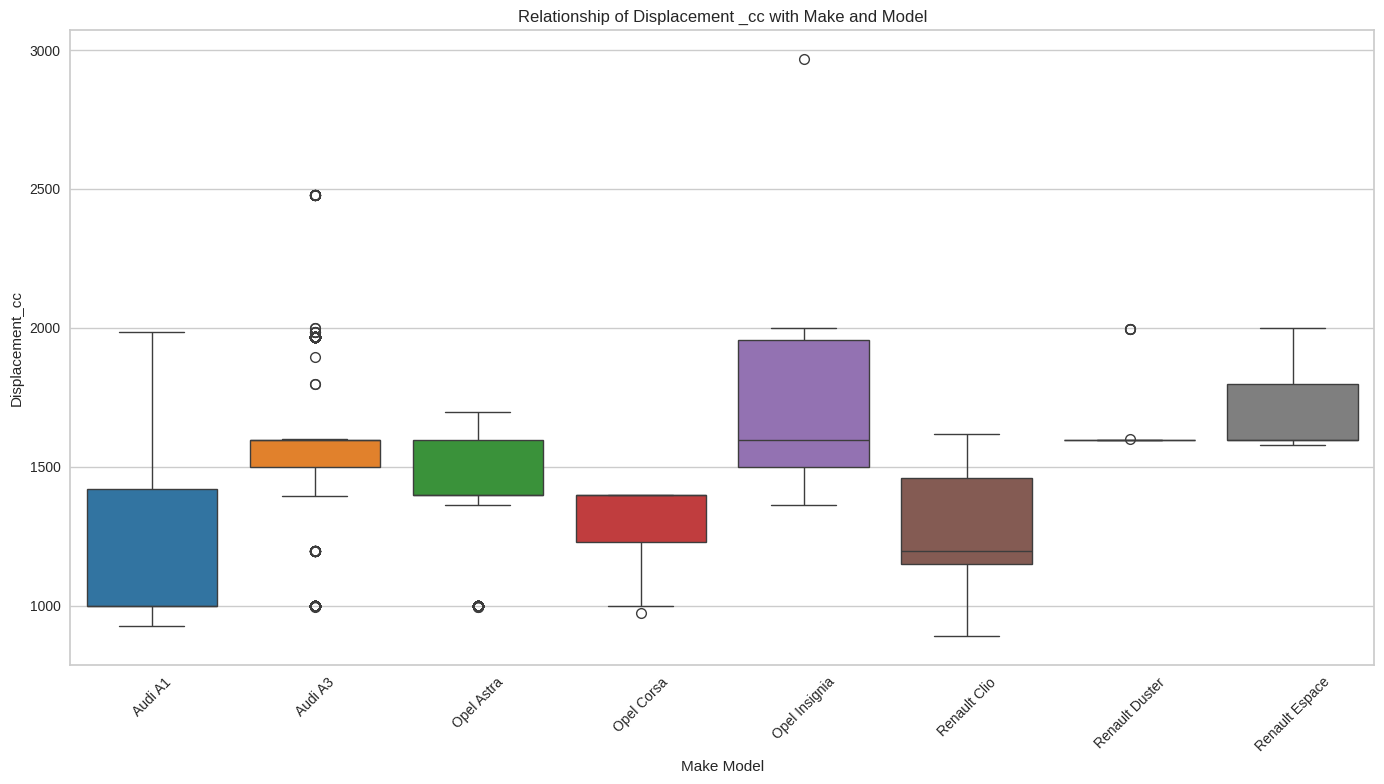

In [ ]:
plt.figure(figsize = (14, 8))
sns.boxplot(data = df , x = "make_model", y = "Displacement_cc", palette = "tab10")
plt.title("Relationship of Displacement _cc with Make and Model")
plt.xlabel("Make Model")
plt.ylabel("Displacement_cc")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

General Evaluation:

Engine Displacement: For most makes and models, the engine displacement is generally concentrated between 1000 cc and 2000 cc.

Outliers: Some models have outliers reaching up to 2500 cc and 3000 cc.

Brand and Model Differences: Engine displacements vary across different makes and models. For example, the Opel Insignia and Renault Espace generally have higher engine displacements.

Motor hacmini santimetreküp (cc) cinsinden belirtir.

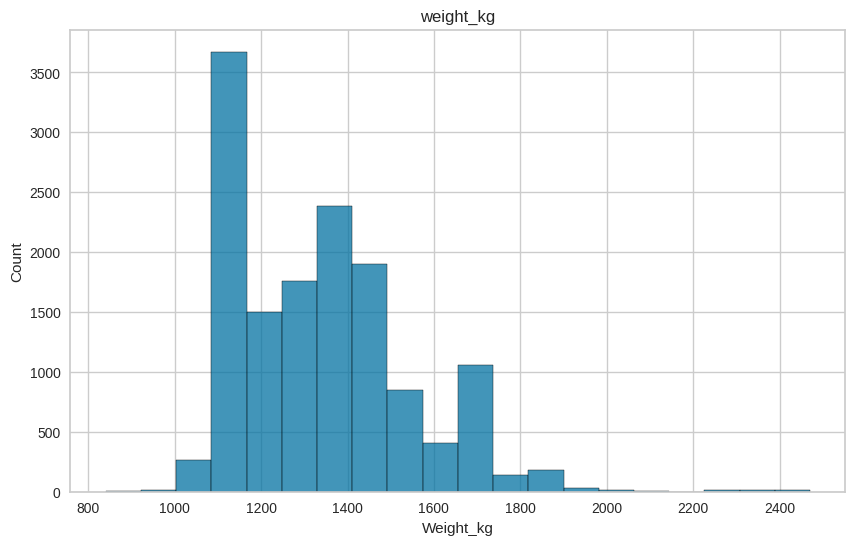

In [ ]:
sns.histplot(data = df , x = "Weight_kg", bins = 20)
plt.title("weight_kg");

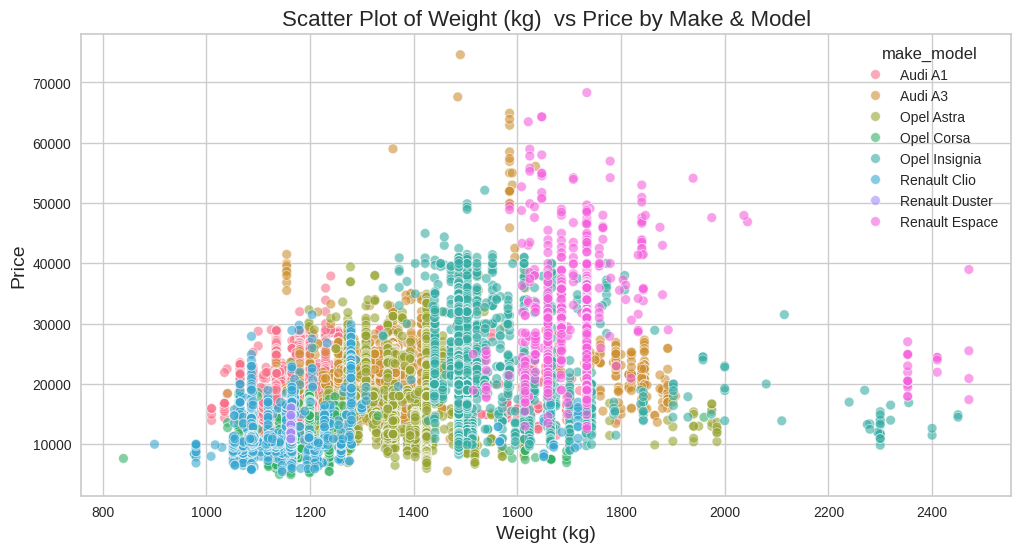

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = "Weight_kg", y = "price", data = df, hue = "make_model", alpha = 0.6)

plt.title("Scatter Plot of Weight (kg)  vs Price by Make & Model", fontsize = 16)
plt.xlabel("Weight (kg)", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

General Evatuation:



*   Weight and Price Relationship: Generally, as weight increases, price also increases. Heavier vehicles have higher prices.


* Model Differences: There are significant differences in the weights and prices of vehicles across different makes and models.


*   Outlier: Some models, especially heavier vehicles, have high- prices outliers.





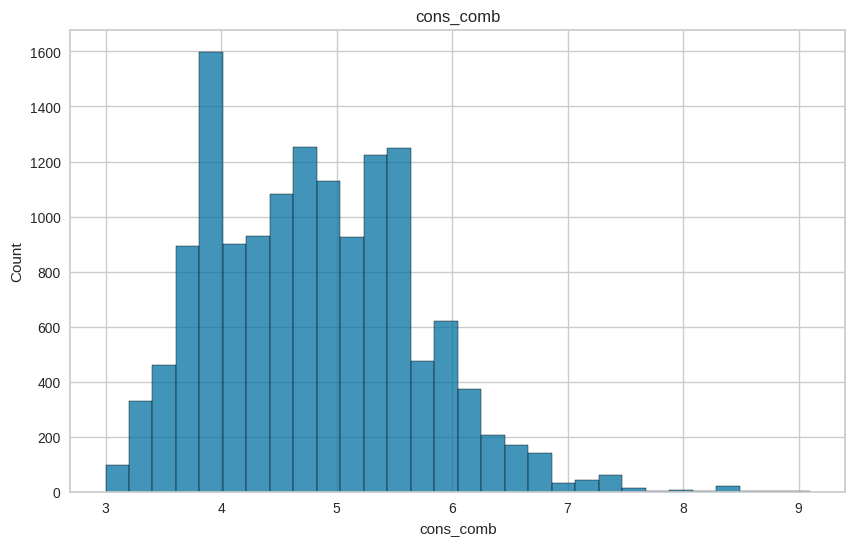

In [ ]:
sns.histplot(data = df, x = "cons_comb", bins = 30)
plt.title("cons_comb");

In [ ]:
fig = px.scatter(df , x ="cons_comb", y = "price", color = "make_model",
                 title = "Scatter Plot of Combined Consumption (cons_comb) vs Price by Make_Model",
                 labels = {"cons_comb" : "Combined Consumption (L/100km)", "price" : "Price"},
                 size_max = 10, opacity = 0.6)

# Enhancing the layout and removing the legend
fig.update_layout(title_font_size = 16, xaxis_title_font_size = 14, yaxis_title_font_size = 14 , showlegend = False)

fig.show()

## General Evaluation:



*   Fuel Consumption and Price Relationship: Generally, vehicles with low and moderate fuel consumption have lower and more common prices, while vehilces with light fuel consumtion have more variable and higher prices.

*   Model Differences: THere are significant differences in fuel consuption and prices of vehicles across different makes and models
*   Outliers: Some Models, especially those with high fuel cosumption, have high-prices outliers



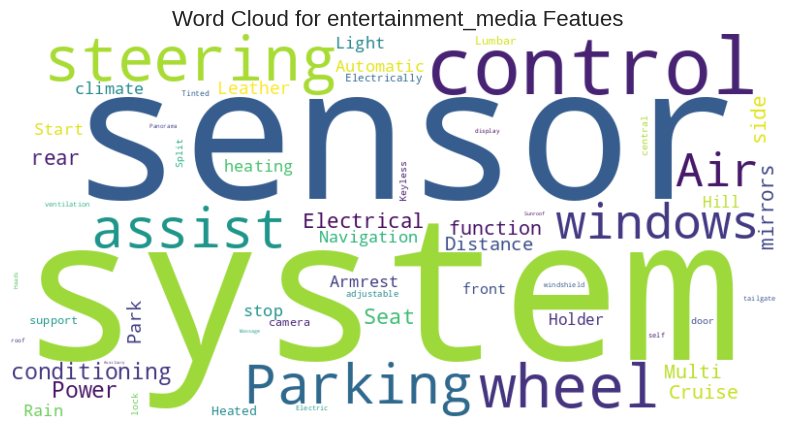

In [ ]:
from wordcloud import WordCloud

text_data = " ".join(df["Comfort_Convenience"].dropna().values)

wordcloud = WordCloud(width = 800, height = 400, background_color = "white", colormap = "viridis", collocations = False).generate(text_data)

plt.figure(figsize = (10, 6))
plt.axis("off")
plt.imshow(wordcloud, interpolation = "bilinear")
plt.title("Word Cloud for entertainment_media Featues", fontsize = 16)
plt.show()

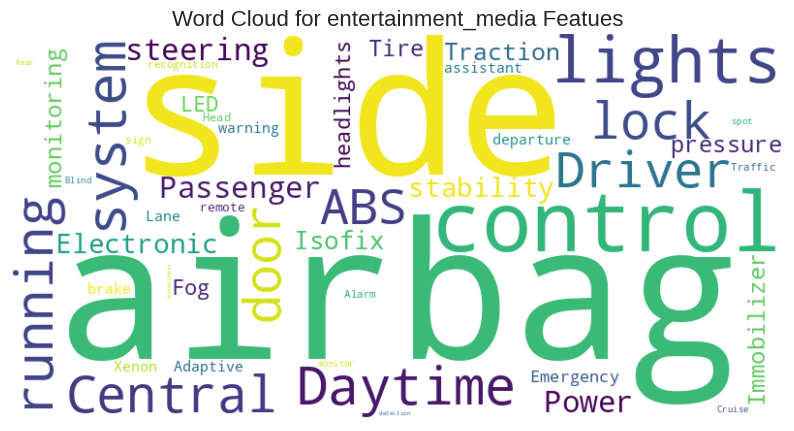

In [ ]:
from wordcloud import WordCloud

text_data = " ".join(df["Safety_Security"].dropna().values)

wordcloud = WordCloud(width = 800, height = 400, background_color = "white", colormap = "viridis", collocations = False).generate(text_data)

plt.figure(figsize = (10, 6))
plt.axis("off")
plt.imshow(wordcloud, interpolation = "bilinear")
plt.title("Word Cloud for entertainment_media Featues", fontsize = 16)
plt.show()

In [ ]:
df[df.price == df.price.min()]

make_model body_type  price             vat         km  Type    Fuel  \
8825  Opel Corsa    Sedans   4950  VAT deductible 179521.000  Used  Diesel   

      Gears                                Comfort_Convenience  \
8825  5.000  Air conditioning,Automatic climate control,Ele...   

                                Entertainment_Media        Extras  \
8825  Bluetooth,CD player,MP3,On-board computer,USB  Alloy wheels   

                                        Safety_Security   age  \
8825  ABS,Central door lock with remote control,Driv... 3.000   

      Previous_Owners  hp_kW  Inspection_new Paint_Type Upholstery_type  \
8825            1.000 70.000               0   Metallic           Cloth   

     Gearing_Type  Displacement_cc  Weight_kg Drive_chain  cons_comb  
8825       Manual         1248.000   1163.000       front      3.200

In [ ]:
df[df.price == df.price.max()]

make_model body_type  price             vat        km  Type     Fuel  \
3648    Audi A3    Sedans  74600  VAT deductible 13000.000  Used  Benzine   

      Gears                                Comfort_Convenience  \
3648  7.000  Air conditioning,Armrest,Automatic climate con...   

                    Entertainment_Media  \
3648  CD player,On-board computer,Radio   

                                         Extras  \
3648  Alloy wheels,Sport seats,Sport suspension   

                                        Safety_Security   age  \
3648  ABS,Alarm system,Central door lock,Driver-side... 1.000   

      Previous_Owners   hp_kW  Inspection_new Paint_Type    Upholstery_type  \
3648            1.000 294.000               0   Metallic  Part/Full Leather   

        Gearing_Type  Displacement_cc  Weight_kg Drive_chain  cons_comb  
3648  Semi-automatic         2480.000   1490.000         4WD      8.300

<Axes: xlabel='price', ylabel='Count'>

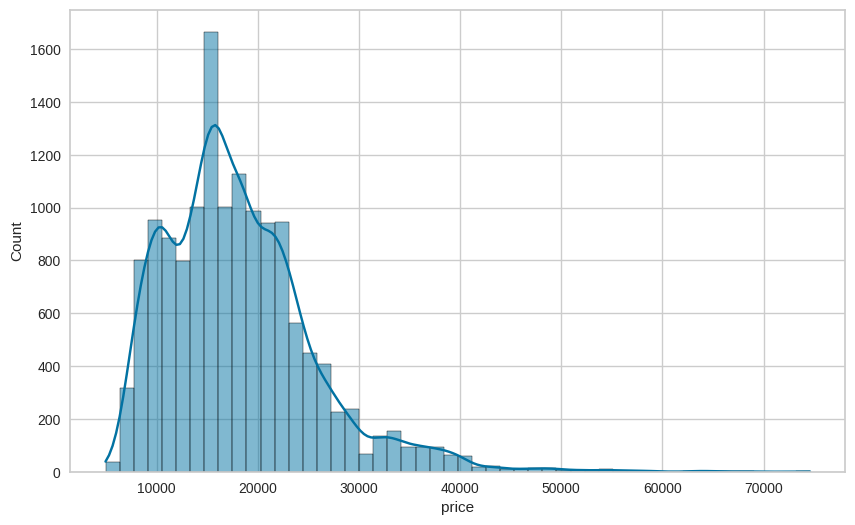

In [ ]:
sns.histplot(df.price, bins = 50 , kde = True)

# Detection of Outliers

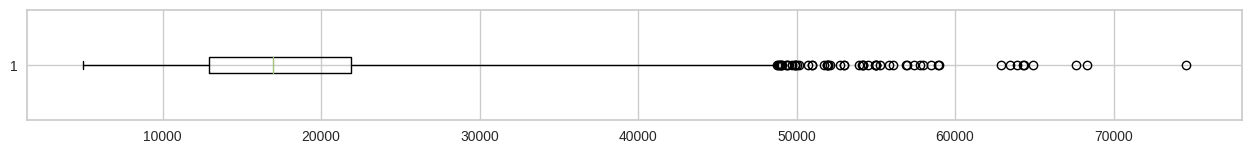

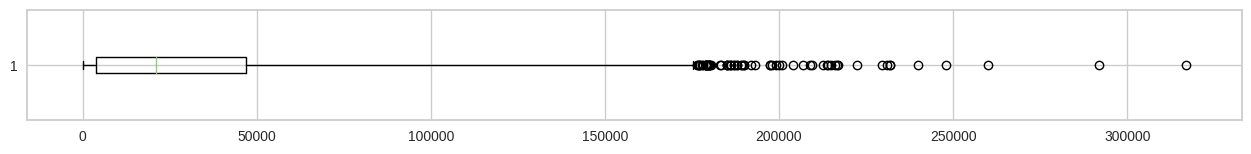

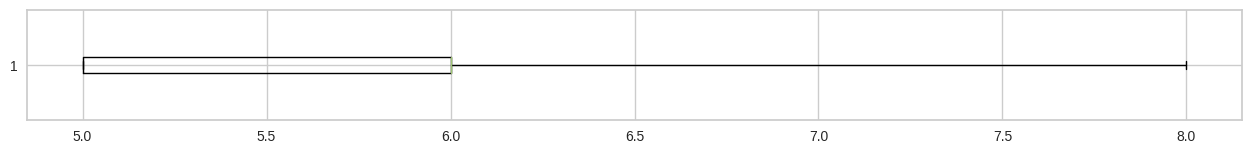

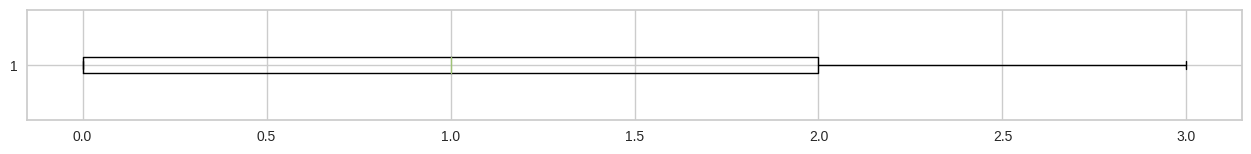

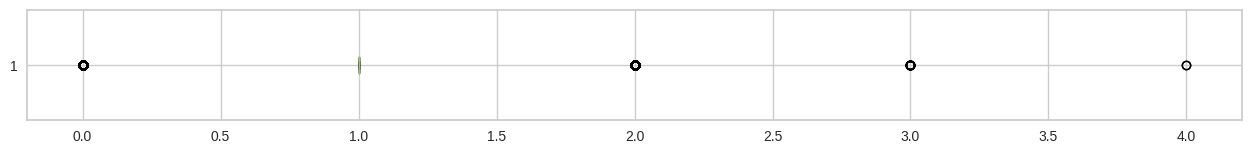

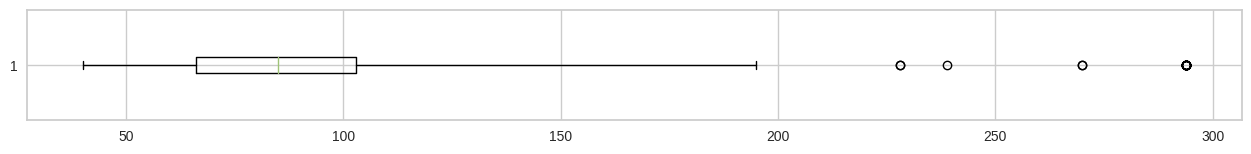

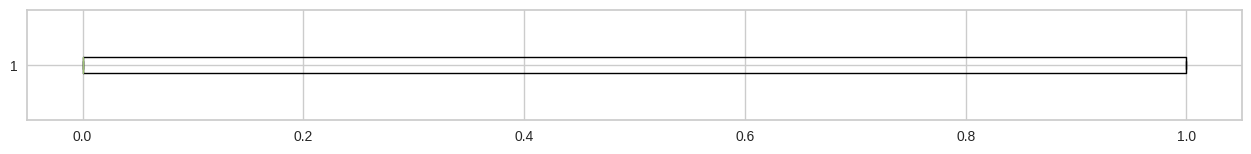

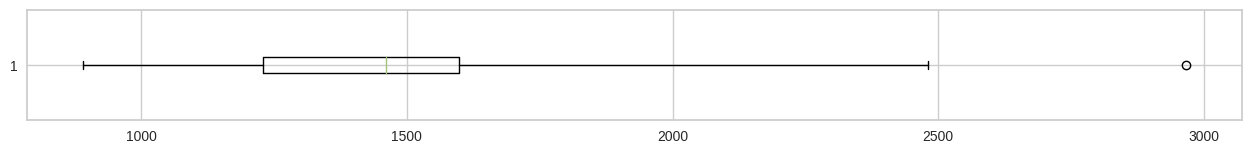

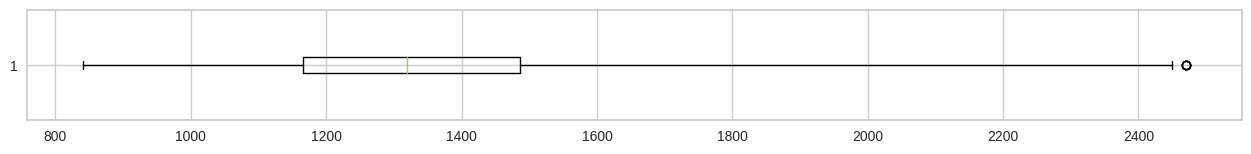

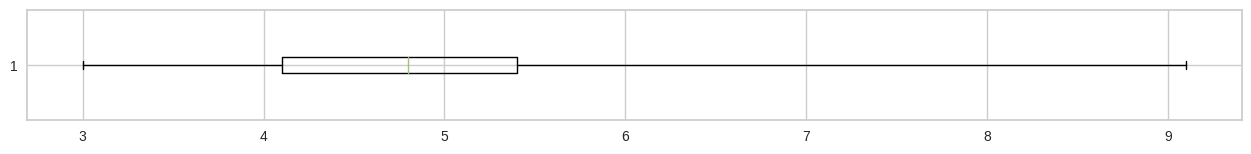

In [ ]:
index = 0
for feature in df.select_dtypes("number").columns:
  index += 1
  plt.figure(figsize = (25, 35))
  plt.subplot((len(df.columns)),2, index)
  plt.boxplot(x = feature, data = df,  whis = 3, vert=False)
  plt.tight_layout()

  plt.show()

In [ ]:
total_outlier = []

for model in df.make_model.unique():

  car_prices = df[df["make_model"]== model]["price"]

  Q1 = car_prices.quantile(0.75)
  Q3 = car_prices.quantile(0.25)
  IQR = Q3 - Q1
  lower_lim = Q1 -1.5*IQR
  higher_lim = Q3 - 1.5*IQR

  count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > higher_lim)])

  total_outlier.append(count_of_outliers)

  print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")

  print()
print("Total_outliers : ",sum(total_outlier), "The rate of total outliers :", (sum(total_outlier)/len(df)).round(3))


TypeError: unsupported format string passed to Series.__format__

In [ ]:
total_outliers = []

for model in df.make_model.unique():

    car_prices = df[df["make_model"]== model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()

    total_outliers.append(count_of_outliers)

    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

# Model Sensitive to Outliers

Linear Regression: As previously mentioned, linear regression is sensitive to outliers.

Logistic Regression: Logistic regression is a type of linear regression and can be similarly affected by outliers.

K-Nearest Neighbors (KNN): The KNN algorithm can be influenced by outliers when the value of k is small.

Univariate Time Series Models: Models such as ARIMA can be sensitive to outliers.

Mode**ls Less Sensitive to Outliers**

Decision Tree & Random Forest: These models split data points and are generally robust to outliers.

Support Vector Machines (SVM) with RBF Kernel: SVM with an RBF kernel can be robust to outliers.

Ensemble Methods: Ensemble methods like boosting and bagging combine multiple models, making them generally more robust to outliers.

**Summary**

The senstivity of a model to outliers depends on its structural characteristics ans the optimization techniques it uses. Linear  models are typically senstive to outliers because they look for linear relationships between data points and use loss functions like MSE that amplify large errors. Some models(e.g. decision trees, robust regression) are most resistant to outliers and are loss affected by such data. therfore, when choosing a model. the characteristics of the dataset and the presence of outliers should be considered.

# Correlation

In [ ]:
df_numeric = df.select_dtypes(include = [np.number])

In [ ]:
sns.heatmap(df_numeric.corr(), annot = True, cmap = "Blues")
plt.title("Correlation");

In [ ]:
sns.pairplot(df, corner = True)

In [ ]:
def plot_target_correlation_heatmap(df , target_variable):

  df_numeric = df.select_dtypes(include = [np.number])
  df_corr_target = df_numeric.corr()

  plt.figure(figsize = (2,7))
  sns.heatmap(df_corr_target[[target_variable]], annot = True, vmin = -1, vmax= 1, cmap =  "Blues")
  plt.title(f"Correlation with {target_variable}")
  plt.show()

plot_target_correlation_heatmap(df , "price")

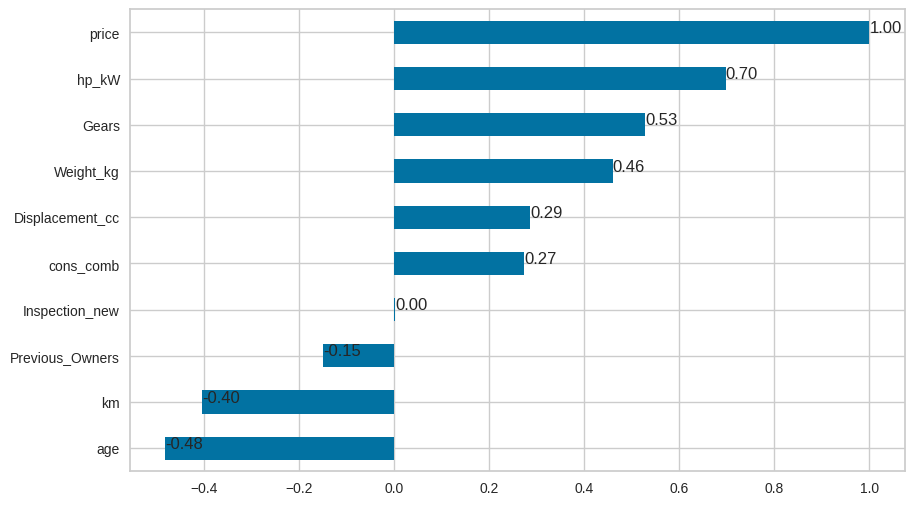

In [ ]:
corr_values = df_numerics = df.select_dtypes(include = [np.number]).corr()["price"].sort_values()
ax = corr_values.plot.barh()
for index, value in enumerate(corr_values):
  plt.text(value, index, "{:.2f}".format(value))

plt.show()

# Multicollinearity control

In [ ]:
df_numeric = df.select_dtypes(include =[np.number])
df_numeric.corr()[(df_numeric.corr()>=0.9) & (df_numeric.corr()  <1 )].any().any()

False

In [ ]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

NOTE: The any() function is used twice. The first any() checks along the columns and returns whether there are any True values. The second any() checks these results along the rows. This checks if there are any negative correlation values between -0.9 and -1 in the correlation matrix.

In [ ]:
def color_correlation1(val):

  """
  Takes a scalar and returns a string with
  the css property in a variety of color scales for different correlations.
  """

  if val >= 0.6 and  val < 0.9999 or val <= -0.6 and val > -0.9999 :
    color = "red"
  elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
  elif val == 1:
        color = 'green'
  else:
        color = 'black'
  return 'color: %s' % color

numeric_df = df.select_dtypes(include=[np.number])

numeric_df.corr().style.applymap(color_correlation1)

In [ ]:
def plot_high_correlation_features(df, target_variable, threshold = 0.40) :
  numeric_df = df.select_dtypes(include = [float, int])
  corr_matrix = numeric_df.corr()
  high_corr_features = corr_matrix[target_variable][corr_matrix[target_variable].abs() > threshold].index.tolist()

  high_corr_features.remove(target_variable)

  for feature in high_corr_features:
        sns.jointplot(y=df[target_variable], x=df[feature], kind='reg')
        plt.title(f'Correlation with {target_variable}: {feature}')
        plt.show()

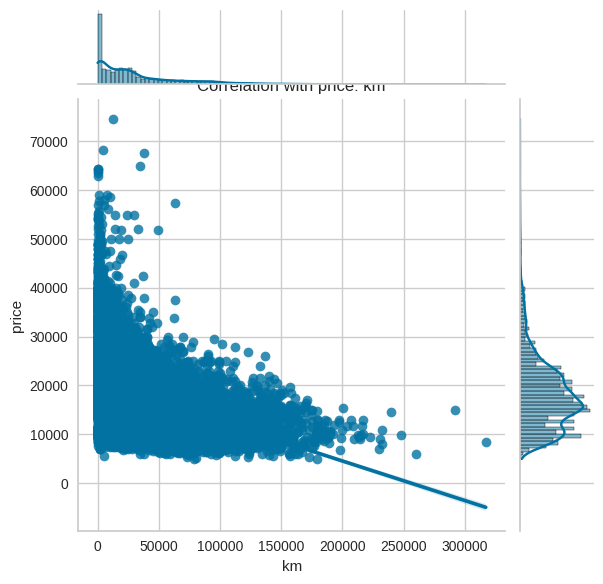

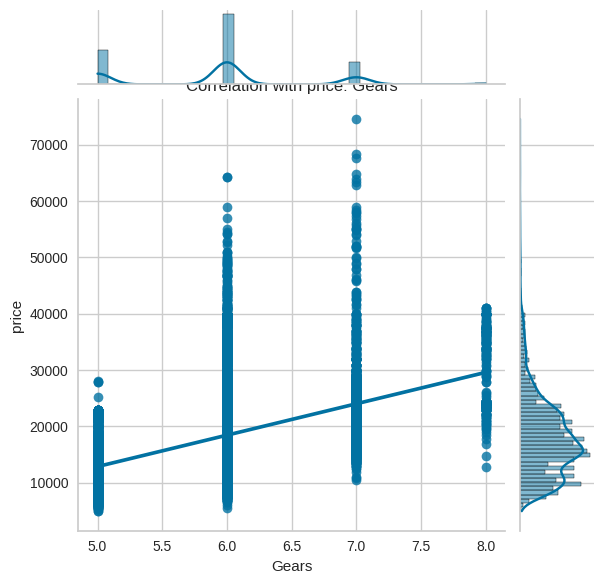

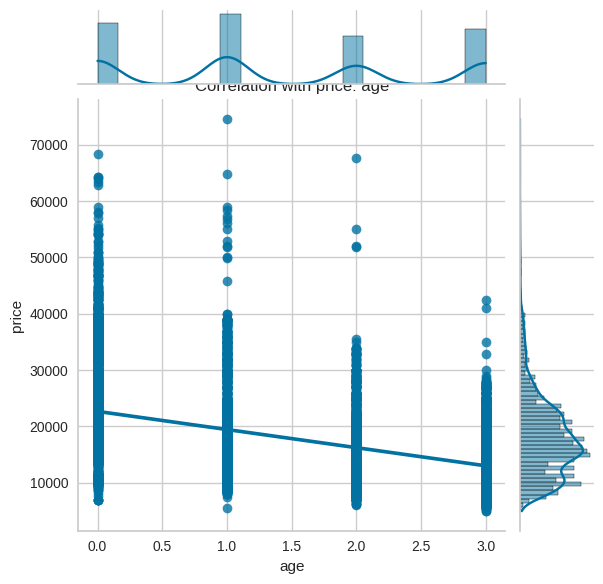

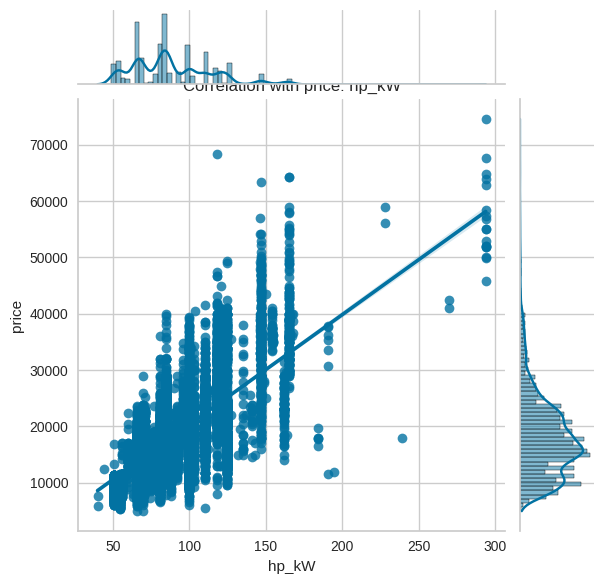

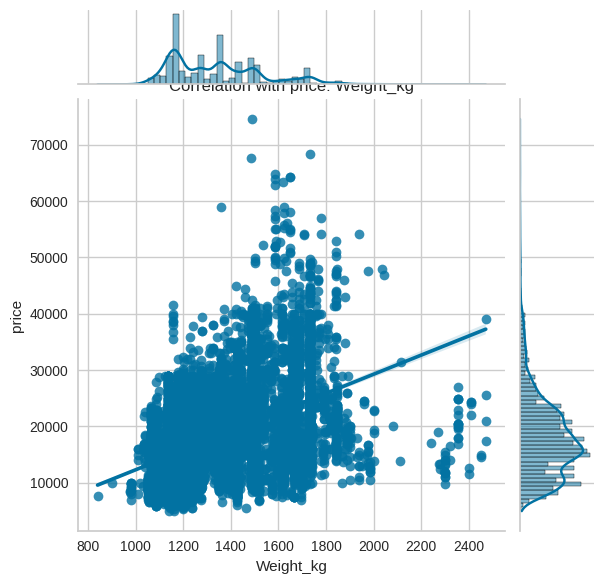

In [ ]:
target_variable = 'price'
plot_high_correlation_features(df, target_variable)

In [ ]:
num_cols= df.select_dtypes('number').columns

skew_limit = 0.75               # define a limit above which we will log transform
skew_vals = df[num_cols].skew()


# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
skew_cols

Skew
km              1.651
hp_kW           1.330
price           1.269
Inspection_new  1.116
Previous_Owners 1.103
Weight_kg       1.069

# Encoding

In [ ]:
selected_columns = ["Comfort_Convenience", "Entertainment_Media","Extras", "Safety_Security"]
df_selected = df[selected_columns]
df_selected.head()

Comfort_Convenience  \
0  Air conditioning,Armrest,Automatic climate con...   
1  Air conditioning,Automatic climate control,Hil...   
2  Air conditioning,Cruise control,Electrical sid...   
3  Air suspension,Armrest,Auxiliary heating,Elect...   
4  Air conditioning,Armrest,Automatic climate con...   

                                 Entertainment_Media  \
0  Bluetooth,Hands-free equipment,On-board comput...   
1  Bluetooth,Hands-free equipment,On-board comput...   
2                              MP3,On-board computer   
3  Bluetooth,CD player,Hands-free equipment,MP3,O...   
4  Bluetooth,CD player,Hands-free equipment,MP3,O...   

                                              Extras  \
0     Alloy wheels,Catalytic Converter,Voice Control   
1  Alloy wheels,Sport seats,Sport suspension,Voic...   
2                         Alloy wheels,Voice Control   
3             Alloy wheels,Sport seats,Voice Control   
4  Alloy wheels,Sport package,Sport suspension,Vo...   

                                     Safety_Security  
0  ABS,Central door lock,Daytime running lights,D...  
1  ABS,Central door lock,Central door lock with r...  
2  ABS,Central door lock,Daytime running lights,D...  
3  ABS,Alarm system,Central door lock with remote...  
4  ABS,Central door lock,Driver-side airbag,Elect...

In [ ]:
df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [ ]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df, drop_first =True)

In [ ]:
bool_columns = df.columns[df.dtypes == 'bool']
df[bool_columns] = df[bool_columns].astype(int)

In [ ]:
df.head()

price        km  Gears   age  Previous_Owners   hp_kW  Inspection_new  \
0  15770 56013.000  7.000 3.000            2.000  66.000               1   
1  14500 80000.000  7.000 2.000            1.000 141.000               0   
2  14640 83450.000  7.000 3.000            1.000  85.000               0   
3  14500 73000.000  6.000 3.000            1.000  66.000               0   
4  16790 16200.000  7.000 3.000            1.000  66.000               1   

   Displacement_cc  Weight_kg  cons_comb  cc_Air conditioning  \
0         1422.000   1220.000      3.800                    1   
1         1798.000   1255.000      5.600                    1   
2         1598.000   1135.000      3.800                    1   
3         1422.000   1195.000      3.800                    0   
4         1422.000   1135.000      4.100                    1   

   cc_Air suspension  cc_Armrest  cc_Automatic climate control  \
0                  0           1                             1   
1                  0           0                             1   
2                  0           0                             0   
3                  1           1                             0   
4                  0           1                             1   

   cc_Auxiliary heating  cc_Cruise control  cc_Electric Starter  \
0                     0                  1                    0   
1                     0                  0                    0   
2                     0                  1                    0   
3                     1                  0                    0   
4                     0                  0                    0   

   cc_Electric tailgate  cc_Electrical side mirrors  \
0                     0                           1   
1                     0                           0   
2                     0                           1   
3                     0                           1   
4                     0                           1   

   cc_Electrically adjustable seats  cc_Electrically heated windshield  \
0                                 0                                  0   
1                                 0                                  0   
2                                 0                                  0   
3                                 0                                  0   
4                                 0                                  0   

   cc_Heads-up display  cc_Heated steering wheel  cc_Hill Holder  \
0                    0                         0               1   
1                    0                         0               1   
2                    0                         0               1   
3                    1                         0               1   
4                    0                         0               1   

   cc_Keyless central door lock  cc_Leather seats  cc_Leather steering wheel  \
0                             0                 0                          1   
1                             0                 0                          1   
2                             0                 0                          1   
3                             0                 0                          1   
4                             0                 0                          1   

   cc_Light sensor  cc_Lumbar support  cc_Massage seats  \
0                1                  0                 0   
1                0                  1                 0   
2                0                  0                 0   
3                1                  1                 0   
4                1                  0                 0   

   cc_Multi-function steering wheel  cc_Navigation system  cc_Panorama roof  \
0                                 1                     1                 0   
1                                 0                     0                 0   
2                                 1                     1                 0   
3                 

In [ ]:
df.shape

(14241, 133)

In [ ]:
df.isnull().any().any()

False

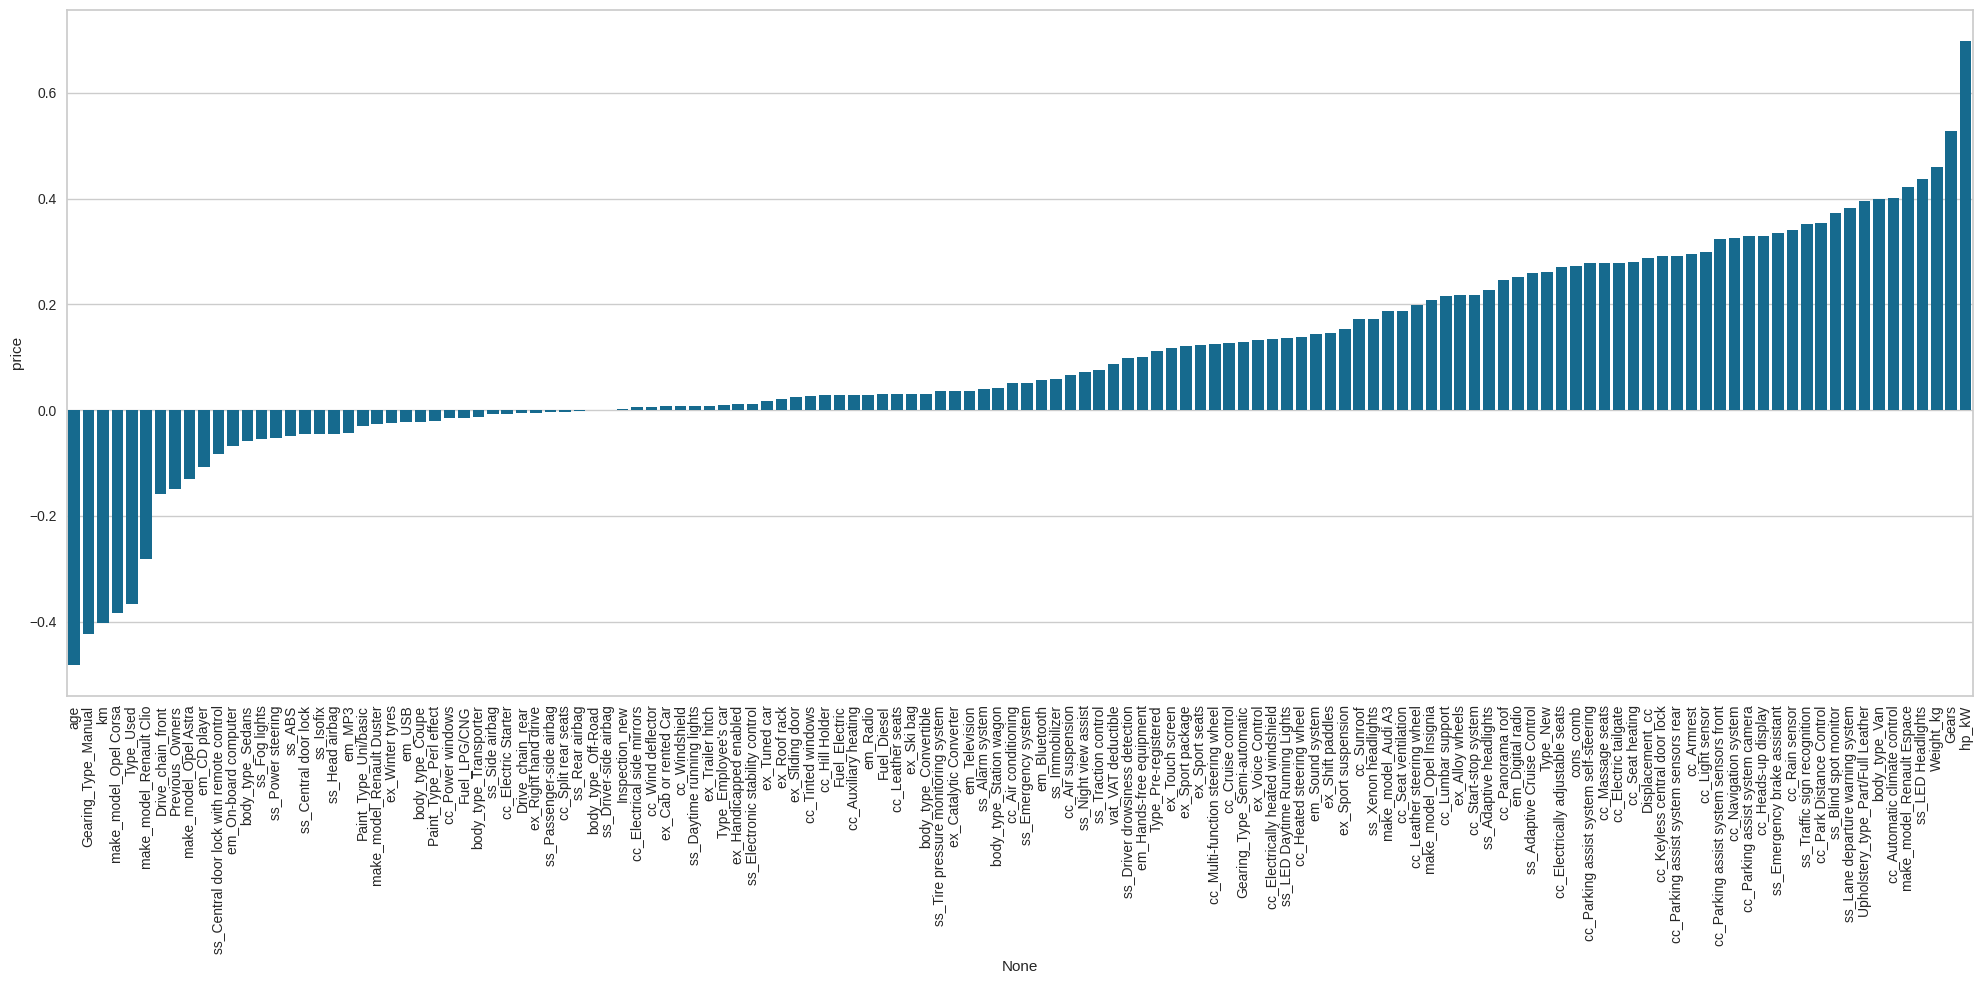

In [ ]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

# Feature Selection(ANOVA)

**Apply ANOVA Test**

Apply the ANOVA test to determine the egffect of each  feature in the dataset on the target variable(price).

**Identify Successful and Failed Features **

Determine successful and failed features based on the anova TEST. Features with p- value less than 0.05 are marked as successful, while those with a p - value greater than 0.05 are marked as falied.

**Present Results Visually**

Present the ANOVA test results visually by formating them in HTML with color coding.

Remove Failed Features **bold text**

Remove the features marked as "failed" based on the ANOVA test results from the dataset.

In [ ]:
from scipy.stats import f_oneway
from IPython.display import display, HTML

# ANOVA test fonksiyonu
def feature_anova_test(df, target):
    results = {}
    features = df.columns.drop(target)
    for feature in features:
        unique_values = df[feature].unique()
        if len(unique_values) > 1:
            groups = [df[df[feature] == value][target] for value in unique_values]
            anova_result = f_oneway(*groups)
            if anova_result.pvalue < 0.05:
                results[feature] = 'successful'
            else:
                results[feature] = 'failed'
        else:
            results[feature] = 'Başarısız (Tek değerli)'
    return results

In [ ]:
target = 'price'
results = feature_anova_test(df, target)


html_result = ""
for feature, result in results.items():
    if result == 'successful':
        html_result += f'<p style="color:red;">{feature}: {result}</p>'
    else:
        html_result += f'<p>{feature}: {result}</p>'

display(HTML(html_result))

In [ ]:
# Identifying characteristics that fail
false_features = [feature for feature, result in results.items() if 'failed' in result]

# Remove failed features from the data set
df = df.drop(columns=false_features)

# Display a summary of the new data set
df.head()

price        km  Gears   age  Previous_Owners   hp_kW  Displacement_cc  \
0  15770 56013.000  7.000 3.000            2.000  66.000         1422.000   
1  14500 80000.000  7.000 2.000            1.000 141.000         1798.000   
2  14640 83450.000  7.000 3.000            1.000  85.000         1598.000   
3  14500 73000.000  6.000 3.000            1.000  66.000         1422.000   
4  16790 16200.000  7.000 3.000            1.000  66.000         1422.000   

   Weight_kg  cons_comb  cc_Air conditioning  cc_Air suspension  cc_Armrest  \
0   1220.000      3.800                    1                  0           1   
1   1255.000      5.600                    1                  0           0   
2   1135.000      3.800                    1                  0           0   
3   1195.000      3.800                    0                  1           1   
4   1135.000      4.100                    1                  0           1   

   cc_Automatic climate control  cc_Auxiliary heating  cc_Cruise control  \
0                             1                     0                  1   
1                             1                     0                  0   
2                             0                     0                  1   
3                             0                     1                  0   
4                             1                     0                  0   

   cc_Electric tailgate  cc_Electrically adjustable seats  \
0                     0                                 0   
1                     0                                 0   
2                     0                                 0   
3                     0                                 0   
4                     0                                 0   

   cc_Electrically heated windshield  cc_Heads-up display  \
0                                  0                    0   
1                                  0                    0   
2                                  0                    0   
3                                  0                    1   
4                                  0                    0   

   cc_Heated steering wheel  cc_Hill Holder  cc_Keyless central door lock  \
0                         0               1                             0   
1                         0               1                             0   
2                         0               1                             0   
3                         0               1                             0   
4                         0               1                             0   

   cc_Leather seats  cc_Leather steering wheel  cc_Light sensor  \
0                 0                          1                1   
1                 0                          1                0   
2                 0                          1                0   
3                 0                          1                1   
4                 0                          1                1   

   cc_Lumbar support  cc_Massage seats  cc_Multi-function steering wheel  \
0                  0                 0                                 1   
1                  1                 0                                 0   
2                  0                 0                                 1   
3                  1                 0                                 1   
4                  0                 0                                 1   

   cc_Navigation system  cc_Panorama roof  cc_Park Distance Control  \
0                     1                 0                         1   
1                     0                 0                         0   
2                     1                 0                         1   
3                     1                 0                         0   
4                     0                 0                         1   

   cc_Parking assist system camera  cc_Parking assist system self-steering  \
0                                0            

In [ ]:
df.shape

(14241, 111)

In [ ]:
df1 = df.copy()

#Models

##Train | Test Split

In [ ]:
X= df.drop(columns="price")
y= df.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape: {}\ny Test features shape: {}"
      .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (12816, 110)
y Train features shape: (12816,)
X Test features shape: (1425, 110)
y Test features shape: (1425,)


# Linear Regression Model

In [ ]:
def train_val(model, X_train, y_train, X_test, y_test,i):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {
    i+"_train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    i+"_test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }

    return pd.DataFrame(scores)

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm_scores = train_val(lm, X_train, y_train, X_test, y_test, "linear")
lm_scores

linear_train  linear_test
R2           0.885        0.878
mae       1762.883     1783.095
mse    6360089.266  6700108.562
rmse      2521.922     2588.457

In [ ]:
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

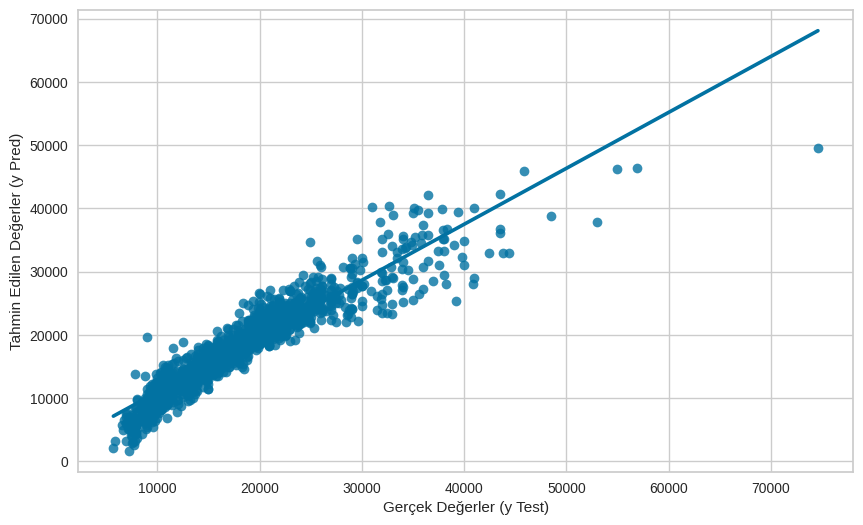

In [ ]:

data = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

sns.regplot(data=data, x='y_test', y='y_pred', ci=None)
plt.xlabel('Gerçek Değerler (y Test)')
plt.ylabel('Tahmin Edilen Değerler (y Pred)')
plt.show()

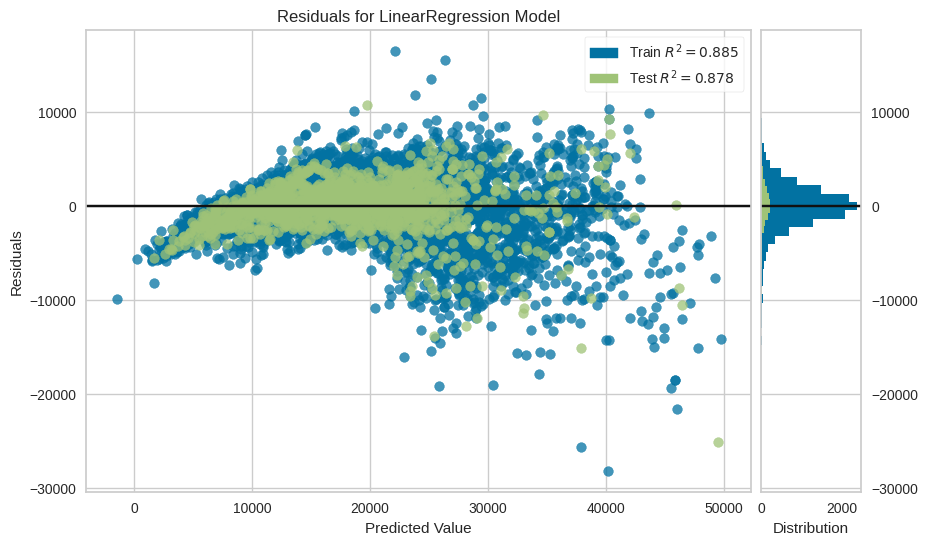

In [ ]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

# Cross Validate

In [ ]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                    'neg_root_mean_squared_error'], cv = 10, return_train_score=True)

In [ ]:
pd.DataFrame(scores, index = range(1, 11))

fit_time  score_time  test_r2  train_r2  test_neg_mean_absolute_error  \
1      0.159       0.007    0.880     0.885                     -1760.956   
2      0.266       0.013    0.886     0.884                     -1766.418   
3      0.239       0.022    0.878     0.885                     -1823.675   
4      0.394       0.021    0.898     0.883                     -1712.778   
5      0.407       0.019    0.878     0.885                     -1745.034   
6      1.374       0.018    0.877     0.885                     -1802.862   
7      0.686       0.022    0.877     0.885                     -1821.692   
8      0.749       0.018    0.878     0.885                     -1796.839   
9      0.417       0.013    0.871     0.886                     -1855.431   
10     0.297       0.006    0.888     0.884                     -1725.483   

    train_neg_mean_absolute_error  test_neg_mean_squared_error  \
1                       -1767.259                 -6389400.964   
2                       -1770.114                 -6173060.481   
3                       -1752.656                 -7536427.426   
4                       -1767.638                 -5682944.678   
5                       -1775.992                 -5604692.654   
6                       -1760.150                 -6372317.613   
7                       -1753.702                 -7257368.953   
8                       -1760.371                 -6621021.215   
9                       -1747.301                 -7534081.333   
10                      -1767.641                 -6214710.082   

    train_neg_mean_squared_error  test_neg_root_mean_squared_error  \
1                   -6363659.858                         -2527.726   
2                   -6392062.647                         -2484.564   
3                   -6248252.721                         -2745.255   
4                   -6443354.007                         -2383.893   
5                   -6452543.217                         -2367.423   
6                   -6367381.033                         -2524.345   
7                   -6279047.638                         -2693.950   
8                   -6339508.427                         -2573.135   
9                   -6238810.649                         -2744.828   
10                  -6384795.543                         -2492.932   

    train_neg_root_mean_squared_error  
1                           -2522.630  
2                           -2528.253  
3                           -2499.651  
4                           -2538.376  
5                           -2540.186  
6                           -2523.367  
7                           -2505.803  
8                           -2517.838  
9                           -2497.761  
10                          -2526.815

In [ ]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                                    0.881
train_r2                                   0.885
test_neg_mean_absolute_error           -1781.117
train_neg_mean_absolute_error          -1762.282
test_neg_mean_squared_error         -6538602.540
train_neg_mean_squared_error        -6350941.574
test_neg_root_mean_squared_error       -2553.805
train_neg_root_mean_squared_error      -2520.068
dtype: float64

In [ ]:

lm_scores


linear_train  linear_test
R2           0.885        0.878
mae       1762.883     1783.095
mse    6360089.266  6700108.562
rmse      2521.922     2588.457

In [ ]:
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

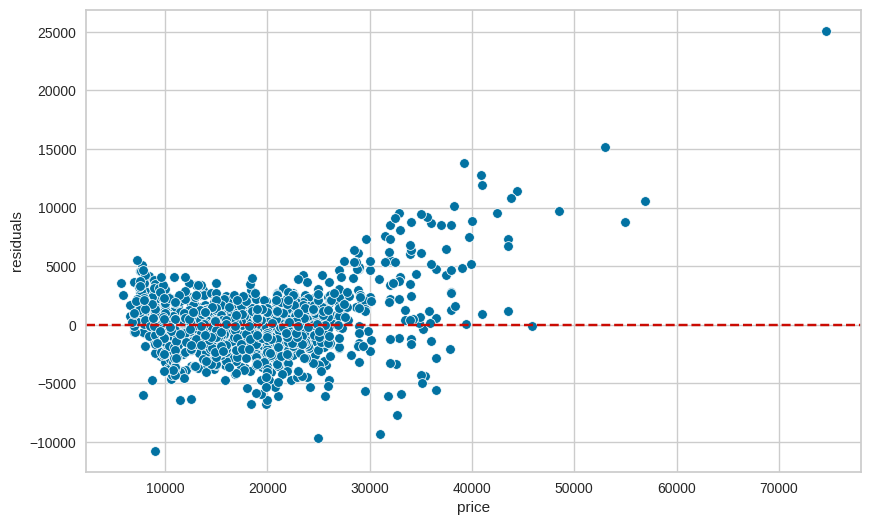

In [ ]:
residuals = y_test-y_pred

plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals");

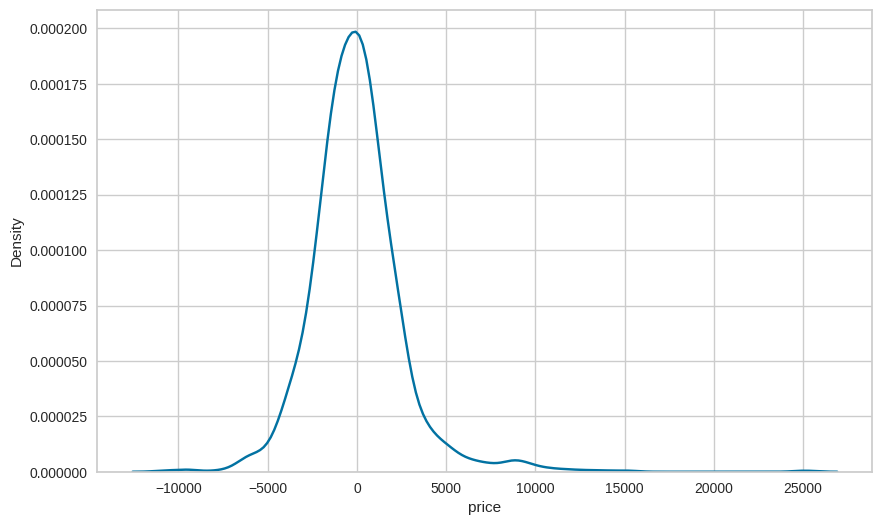

In [ ]:
sns.kdeplot(residuals);

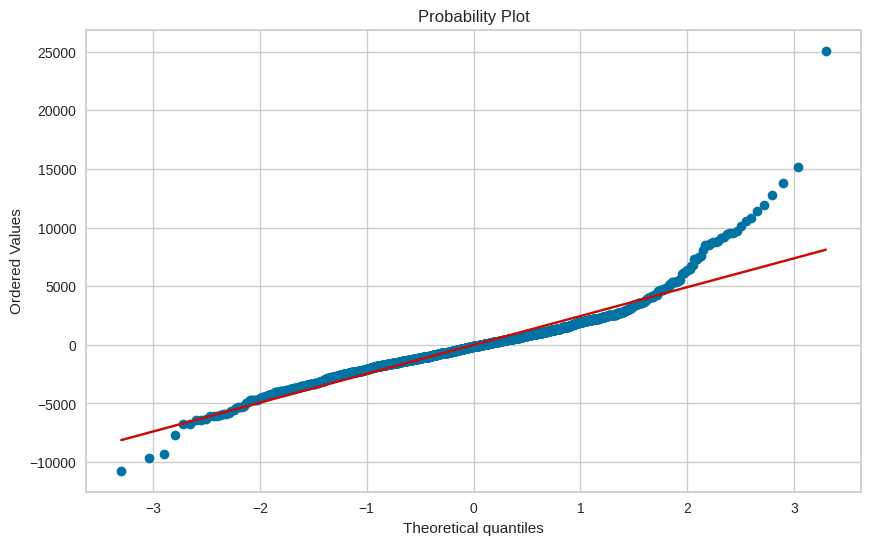

In [ ]:
# pip install scipy
import scipy.stats as stats

stats.probplot(residuals, dist ="norm", plot =plt);

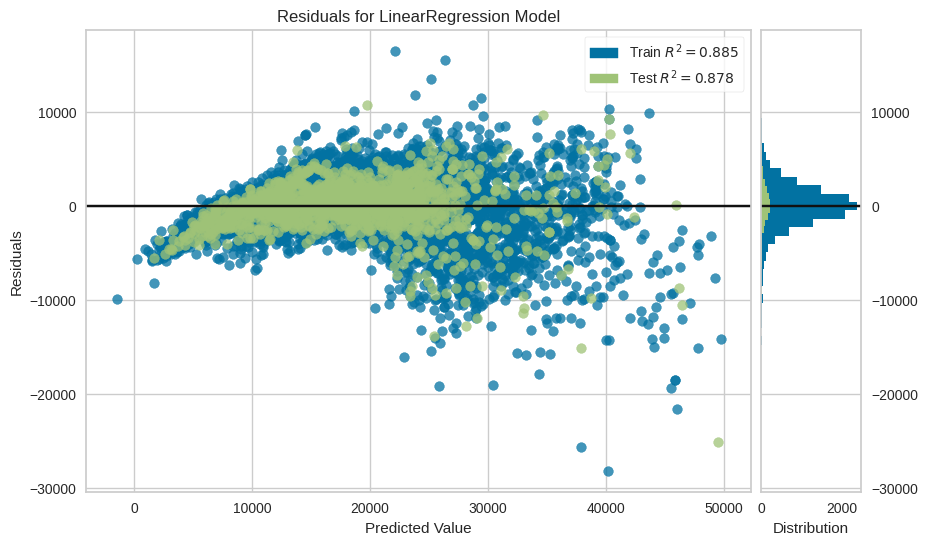

In [ ]:
from yellowbrick.regressor import ResidualsPlot


model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

# Ridge Regression Model

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

ridge_model = Ridge(alpha=1, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [ ]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test, "ridge")

ridge_train  ridge_test
R2          0.884       0.879
mae      1761.980    1780.668
mse   6363861.712 6682157.858
rmse     2522.670    2584.987


# RidgeCV

In [ ]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10, return_train_score=True)

scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()


test_r2                                    0.881
train_r2                                   0.885
test_neg_mean_absolute_error           -1779.933
train_neg_mean_absolute_error          -1761.343
test_neg_mean_squared_error         -6539169.750
train_neg_mean_squared_error        -6355553.450
test_neg_root_mean_squared_error       -2553.884
train_neg_root_mean_squared_error      -2520.983
dtype: float64

# RidgeGridSearchCV

In [ ]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [ ]:
ridge_grid_model = Ridge()
param_grid = {"alpha":alpha_space}

In [ ]:
ridge_grid_model = GridSearchCV(estimator = ridge_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, n_jobs = -1, return_train_score=True)

In [ ]:
ridge_grid_model.fit(X_train_scaled, y_train)


GridSearchCV(cv=10, estimator=Ridge(alpha=1, random_state=42), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:
ridge_grid_model.best_params_

{'alpha': 0.43}

In [ ]:

ridge_grid_model.best_index_

42

In [ ]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[46, ["mean_test_score", "mean_train_score"]]


mean_test_score    -2553.572
mean_train_score   -2520.296
Name: 46, dtype: object

In [ ]:
ridge_grid_model.best_score_

-2553.569792354013

In [ ]:
ridge_grid = train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test, "ridge_grid")
ridge_grid

ridge_grid_train  ridge_grid_test
R2               0.884            0.879
mae           1761.980         1780.668
mse        6363861.712      6682157.858
rmse          2522.670         2584.987

In [ ]:
result = pd.concat([lm_scores, ridge_grid], axis=1)
result

linear_train  linear_test  ridge_grid_train  ridge_grid_test
R2           0.885        0.878             0.884            0.879
mae       1762.883     1783.095          1761.980         1780.668
mse    6360089.266  6700108.562       6363861.712      6682157.858
rmse      2521.922     2588.457          2522.670         2584.987


# Lasso Regression Model

In [ ]:

lasso_model = Lasso(alpha=1)

lasso_model = lasso_model.fit(X_train_scaled, y_train)

#predict
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [ ]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test, "lasso")

lasso_train  lasso_test
R2          0.884       0.879
mae      1762.991    1781.049
mse   6370942.204 6665721.006
rmse     2524.073    2581.806


Lasso GridSearchCV

In [ ]:
lasso_model = Lasso()
param_grid = {"alpha":alpha_space}

In [ ]:
grid_lasso = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, n_jobs = -1, return_train_score=True)

In [ ]:
grid_lasso.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:
grid_lasso.best_params_

# en iyi skoru dönderen alpha hyper parametresi 0.01 miş.

{'alpha': 0.62}

In [ ]:

grid_lasso.best_index_

# en iyi scorun alındığı df indexini döndürür.

61

In [ ]:
pd.DataFrame(grid_lasso.cv_results_).loc[59, ["mean_test_score", "mean_train_score"]]

# Overfiting olmadığını teyit ediyoruz.

mean_test_score    -2558.273
mean_train_score   -2518.545
Name: 59, dtype: object

In [ ]:
grid_lasso.best_score_

# validation setinin scorunu alıyoruz.

-2558.2685107655097

In [ ]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [ ]:

lasso = train_val(grid_lasso, X_train_scaled, y_train, X_test_scaled, y_test, "grid_lasso")
lasso

grid_lasso_train  grid_lasso_test
R2               0.884            0.879
mae           1762.671         1781.673
mse        6364807.638      6674301.412
rmse          2522.857         2583.467

In [ ]:

result = pd.concat([result, lasso], axis=1)
result

linear_train  linear_test  ridge_grid_train  ridge_grid_test  \
R2           0.885        0.878             0.884            0.879   
mae       1762.883     1783.095          1761.980         1780.668   
mse    6360089.266  6700108.562       6363861.712      6682157.858   
rmse      2521.922     2588.457          2522.670         2584.987   

      grid_lasso_train  grid_lasso_test  
R2               0.884            0.879  
mae           1762.671         1781.673  
mse        6364807.638      6674301.412  
rmse          2522.857         2583.467


# Elastic-Net Regression Model

In [ ]:

elastic_model = ElasticNet(alpha = 1, l1_ratio = 0.5, random_state = 42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [ ]:
es = train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test, "elastic")
es

elastic_train  elastic_test
R2            0.596         0.588
mae        3403.250      3401.027
mse    22269138.337  22671406.738
rmse       4719.019      4761.450

## For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [ ]:
elastic_model = ElasticNet(random_state=42, l1_ratio=0.5)
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(random_state=42)

In [ ]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test,"es")

es_train      es_test
R2          0.596        0.588
mae      3403.250     3401.027
mse  22269138.337 22671406.738
rmse     4719.019     4761.450

# Elastic GridSearchCV

In [ ]:
elastic_model = ElasticNet()

In [ ]:

param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [ ]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [ ]:
elastic_grid_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [ ]:

elastic_grid_model.best_index_

5

In [ ]:
elastic_grid_model.best_score_

-2552.11741583322

In [ ]:

gridsearch = train_val(elastic_grid_model,  X_train_scaled, y_train, X_test_scaled, y_test, "ElasticGridSearch")
gridsearch

ElasticGridSearch_train  ElasticGridSearch_test
R2                      0.884                   0.879
mae                  1763.015                1781.013
mse               6371324.363             6665387.957
rmse                 2524.148                2581.741

In [ ]:

result = pd.concat([result, gridsearch], axis=1)
result

linear_train  linear_test  ridge_grid_train  ridge_grid_test  \
R2           0.885        0.878             0.884            0.879   
mae       1762.883     1783.095          1761.980         1780.668   
mse    6360089.266  6700108.562       6363861.712      6682157.858   
rmse      2521.922     2588.457          2522.670         2584.987   

      grid_lasso_train  grid_lasso_test  ElasticGridSearch_train  \
R2               0.884            0.879                    0.884   
mae           1762.671         1781.673                 1763.015   
mse        6364807.638      6674301.412              6371324.363   
rmse          2522.857         2583.467                 2524.148   

      ElasticGridSearch_test  
R2                     0.879  
mae                 1781.013  
mse              6665387.957  
rmse                2581.741

## Lasso Regression Model (Without Outliers)

In [ ]:
df1 = df.copy()

In [ ]:
df1 = df1[~(df1.price > 35000)]

In [ ]:

X= df1.drop(columns="price")
y= df1.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lasso_model = Lasso()
param_grid = {"alpha":alpha_space}

In [ ]:
grid_lasso_out = GridSearchCV(estimator = lasso_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, n_jobs = -1, return_train_score=True)

In [ ]:
grid_lasso_out.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:

lasso_out = train_val(grid_lasso_out, X_train_scaled, y_train, X_test_scaled, y_test, "grid_lasso_out")
lasso_out

grid_lasso_out_train  grid_lasso_out_test
R2                   0.892                0.906
mae               1451.608             1375.526
mse            3994885.658          3501754.538
rmse              1998.721             1871.298

In [ ]:
result = pd.concat([result, lasso_out], axis=1)
result

linear_train  linear_test  ridge_grid_train  ridge_grid_test  \
R2           0.885        0.878             0.884            0.879   
mae       1762.883     1783.095          1761.980         1780.668   
mse    6360089.266  6700108.562       6363861.712      6682157.858   
rmse      2521.922     2588.457          2522.670         2584.987   

      grid_lasso_train  grid_lasso_test  ElasticGridSearch_train  \
R2               0.884            0.879                    0.884   
mae           1762.671         1781.673                 1763.015   
mse        6364807.638      6674301.412              6371324.363   
rmse          2522.857         2583.467                 2524.148   

      ElasticGridSearch_test  grid_lasso_out_train  grid_lasso_out_test  
R2                     0.879                 0.892                0.906  
mae                 1781.013              1451.608             1375.526  
mse              6665387.957           3994885.658          3501754.538  
rmse                2581.741              1998.721             1871.298


# Feature Importance


According to the Ridge graph, I have identified the most important columns as hp_kW (Horsepower in kilowatts), Fuel, make_model, Displacement_cc, km, and age.

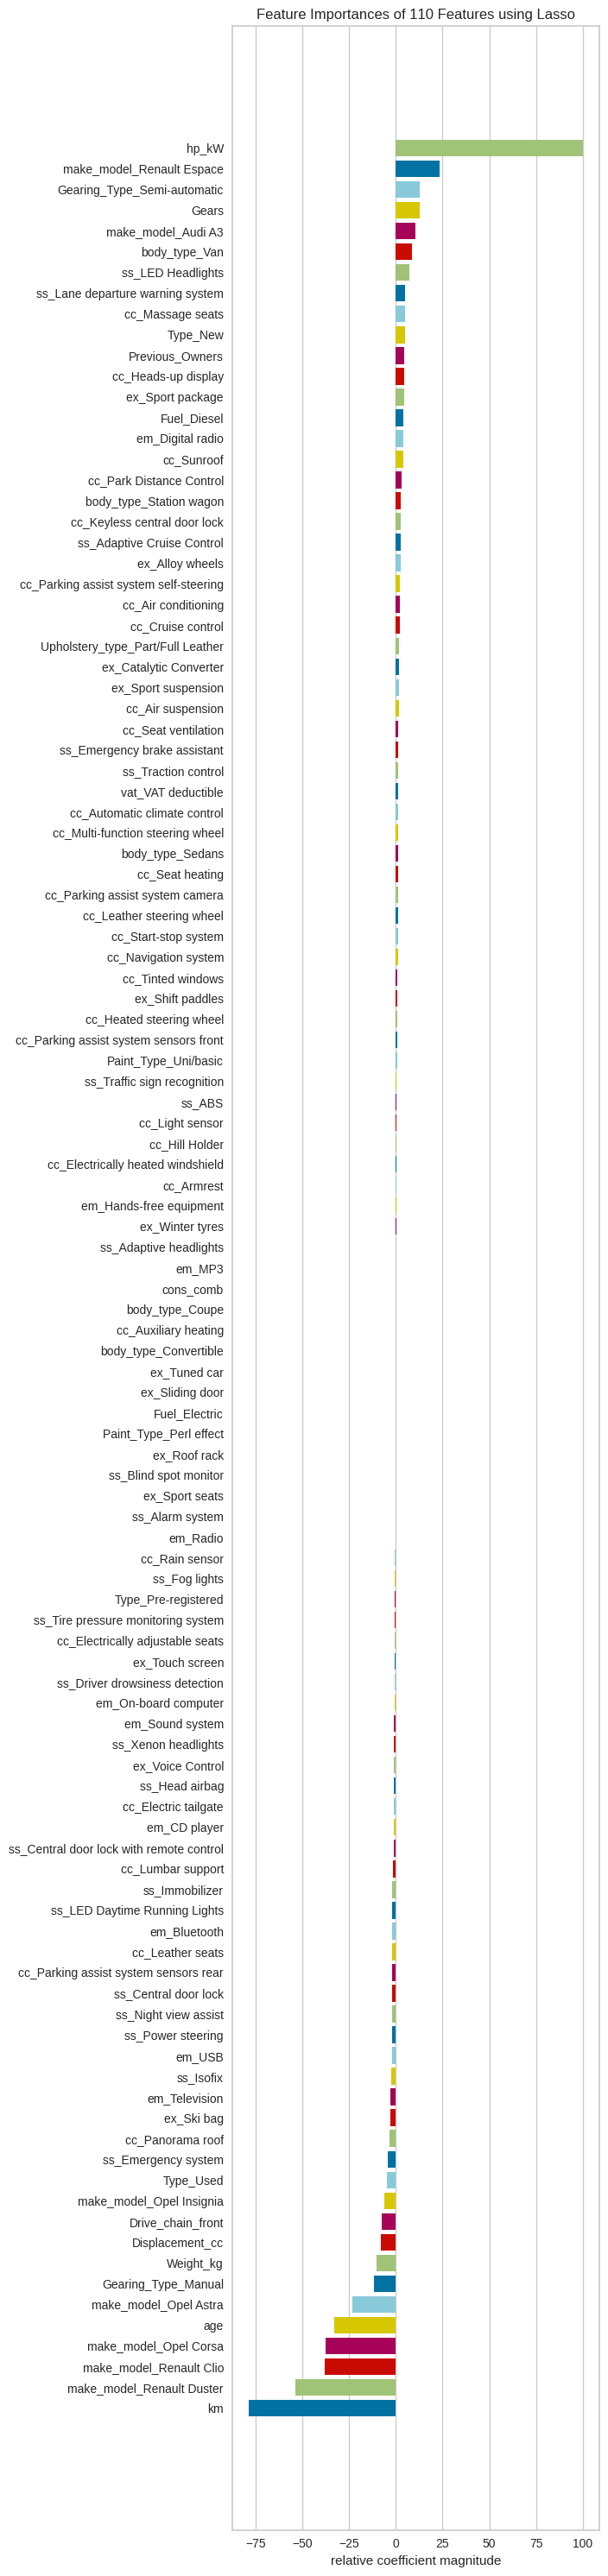

In [ ]:

from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha= 0.6)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

# Lasso modeli için en iyi scoru veren alpha=0.01 hyperparametresiyle modeli FeatureImportances
# fonksiyonunun içine veriyoruz.  labels olarak da df'in columns isimlerini veriyoruz.

# lasso üzerinden feature selection yapabiliriz


According to the Lasso graph, I have identified the most important columns as hp_kW (Horsepower in kilowatts), Fuel, make_model, Displacement_cc, km, and age. Both graphs give weight to the same columns.


# Customer Regression Model

In [ ]:
# We selected the features that have the most impact on the predictions.
df_new = df0[["make_model", "hp_kW", "km", "age", "Gearing_Type", "price"]]

In [ ]:

df_new.head(1)

make_model  hp_kW        km   age Gearing_Type  price
0    Audi A1 66.000 56013.000 3.000    Automatic  15770

In [ ]:
df_new.drop(index=[2614], inplace=True)
df_new = df_new[~(df_new.price > 35000)]

In [ ]:
df_new = pd.get_dummies(df_new, drop_first =True)
bool_columns = df_new.columns[df_new.dtypes == 'bool']
df_new[bool_columns] = df_new[bool_columns].astype(int)

In [ ]:
df_new.head(1)

hp_kW        km   age  price  make_model_Audi A3  make_model_Opel Astra  \
0 66.000 56013.000 3.000  15770                   0                      0   

   make_model_Opel Corsa  make_model_Opel Insignia  make_model_Renault Clio  \
0                      0                         0                        0   

   make_model_Renault Duster  make_model_Renault Espace  Gearing_Type_Manual  \
0                          0                          0                    0   

   Gearing_Type_Semi-automatic  
0                            0

In [ ]:

X = df_new.drop(columns=["price"])
y = df_new.price

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=42)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha': alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                                 param_grid=param_grid,
                                 scoring='neg_root_mean_squared_error',
                                 cv=10,
                                 n_jobs=-1)

In [ ]:
lasso_final_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error')

In [ ]:
final_model = train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test, "final")
final_model

final_train  final_test
R2          0.869       0.876
mae      1604.516    1556.582
mse   4956988.650 4530105.018
rmse     2226.430    2128.404

In [ ]:

result = pd.concat([result, final_model], axis=1)
result

linear_train  linear_test  ridge_grid_train  ridge_grid_test  \
R2           0.885        0.878             0.884            0.879   
mae       1762.883     1783.095          1761.980         1780.668   
mse    6360089.266  6700108.562       6363861.712      6682157.858   
rmse      2521.922     2588.457          2522.670         2584.987   

      grid_lasso_train  grid_lasso_test  ElasticGridSearch_train  \
R2               0.884            0.879                    0.884   
mae           1762.671         1781.673                 1763.015   
mse        6364807.638      6674301.412              6371324.363   
rmse          2522.857         2583.467                 2524.148   

      ElasticGridSearch_test  grid_lasso_out_train  grid_lasso_out_test  \
R2                     0.879                 0.892                0.906   
mae                 1781.013              1451.608             1375.526   
mse              6665387.957           3994885.658          3501754.538   
rmse                2581.741              1998.721             1871.298   

      final_train  final_test  
R2          0.869       0.876  
mae      1604.516    1556.582  
mse   4956988.650 4530105.018  
rmse     2226.430    2128.404

In [ ]:
y_pred = lasso_final_model.predict(X_test)
y_train_pred = lasso_final_model.predict(X_train)
residuals = y_test-y_pred

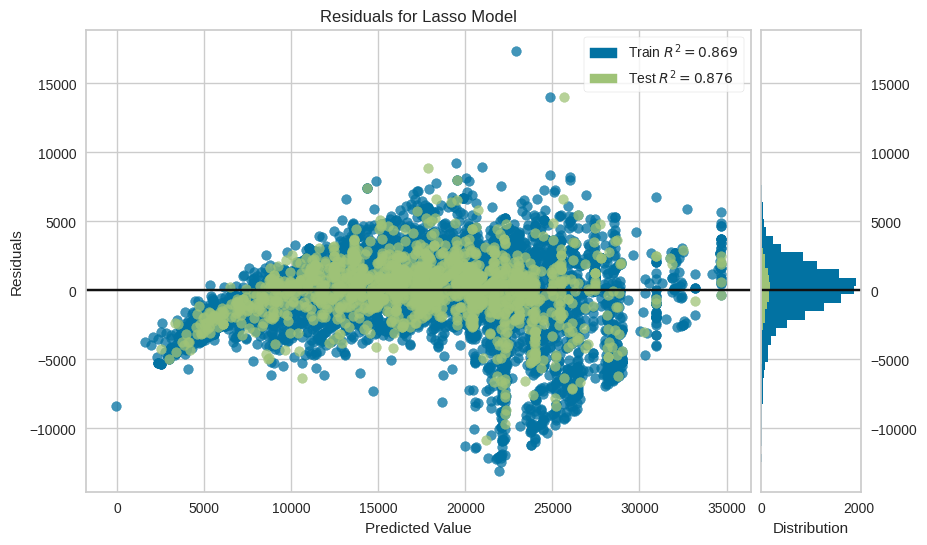

In [ ]:

from yellowbrick.regressor import ResidualsPlot


model = Lasso(random_state=42)
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();


# Compare Models Performance

In [ ]:
result


linear_train  linear_test  ridge_grid_train  ridge_grid_test  \
R2           0.885        0.878             0.884            0.879   
mae       1762.883     1783.095          1761.980         1780.668   
mse    6360089.266  6700108.562       6363861.712      6682157.858   
rmse      2521.922     2588.457          2522.670         2584.987   

      grid_lasso_train  grid_lasso_test  ElasticGridSearch_train  \
R2               0.884            0.879                    0.884   
mae           1762.671         1781.673                 1763.015   
mse        6364807.638      6674301.412              6371324.363   
rmse          2522.857         2583.467                 2524.148   

      ElasticGridSearch_test  grid_lasso_out_train  grid_lasso_out_test  \
R2                     0.879                 0.892                0.906   
mae                 1781.013              1451.608             1375.526   
mse              6665387.957           3994885.658          3501754.538   
rmse                2581.741              1998.721             1871.298   

      final_train  final_test  
R2          0.869       0.876  
mae      1604.516    1556.582  
mse   4956988.650 4530105.018  
rmse     2226.430    2128.404

In [ ]:

def plot_metrics(result):
    for i, metric in enumerate(result.index):
        plt.figure(i)
        if metric == "R2":
            ascending = False
        else:
            ascending = True
        compare = result.sort_values(by=metric, axis=1, ascending=ascending)
        ax = sns.barplot(x=compare.loc[metric], y=compare.columns, color="royalblue")
        for p in ax.patches:
            width = p.get_width()
            ax.text(width,
                    p.get_y() + p.get_height() / 2,
                    '{:.4f}'.format(width),
                    ha='left',
                    va='center')
        plt.title(f'Comparison of {metric}')
        plt.show()

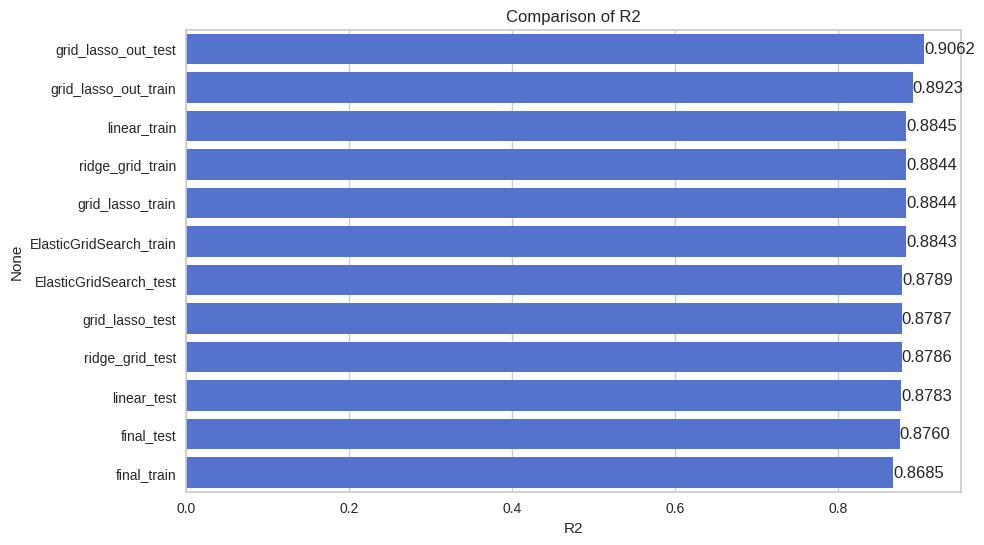

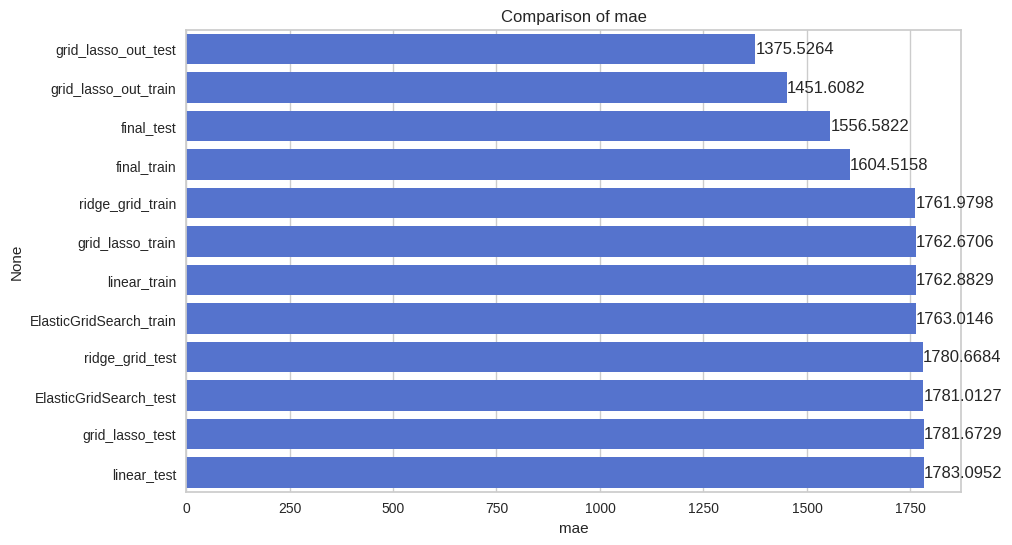

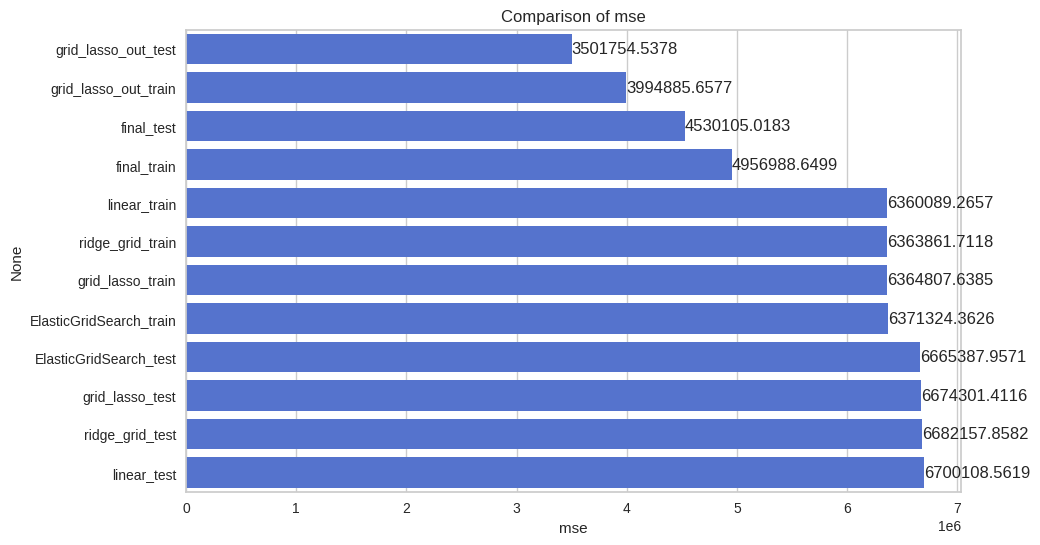

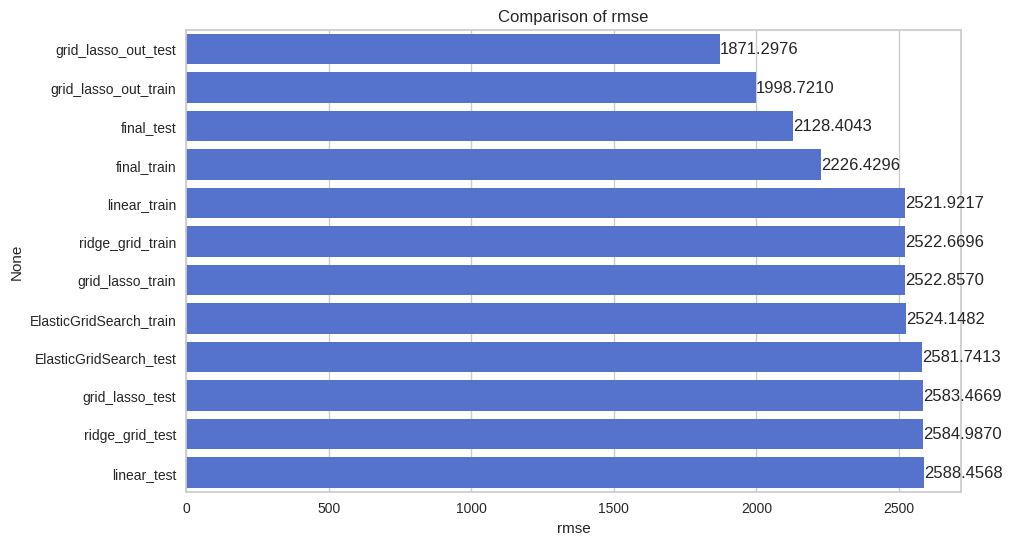

In [ ]:

plot_metrics(result)


# Final Model and Model Deployment

In [ ]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [ ]:

lasso_model = Lasso()

param_grid = {'alpha': alpha_space}

final_model = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=10,
                           n_jobs=-1)

In [ ]:
final_model.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error')

In [ ]:
import pickle
pickle.dump(final_model, open("final_pipe_model", "wb"))

In [ ]:
new_model = pickle.load(open("final_pipe_model", "rb"))

In [ ]:
new_model

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             scoring='neg_root_mean_squared_error')


# Prediction


## Prediction with new observation

In [ ]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [ ]:
my_dict = pd.DataFrame([my_dict])
my_dict = pd.get_dummies(my_dict)
my_dict = my_dict.reindex(columns=X.columns, fill_value=0)

In [ ]:
my_dict = final_scaler.transform(my_dict)
my_dict

array([[0.13065327, 0.05362776, 0.66666667, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]])

In [ ]:
new_model.predict(my_dict)

array([19559.43338643])

In [ ]:
random_samples = df_new.sample(n=50)

In [ ]:
X_random = random_samples.drop(columns=["price"])
X_random = final_scaler.transform(X_random)
predictions = final_model.predict(X_random)

In [ ]:
true_labels = random_samples["price"].values

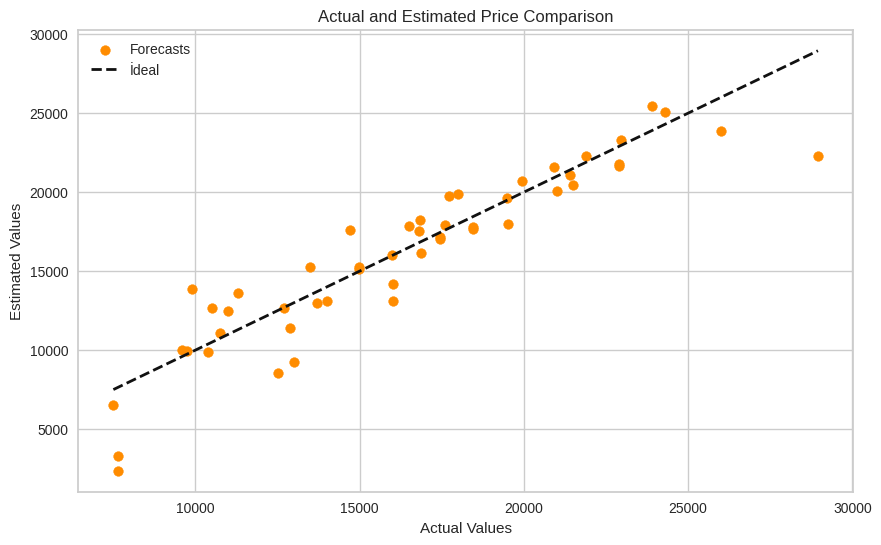

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(true_labels, predictions, color='darkorange', label='Forecasts')
plt.plot([min(true_labels), max(true_labels)], [min(true_labels), max(true_labels)], 'k--', lw=2, label='İdeal')
plt.xlabel('Actual Values')
plt.ylabel('Estimated Values')
plt.title('Actual and Estimated Price Comparison')
plt.legend()
plt.show()

#**  Conclusion**
**Project Summary and Conclusions**

**Model Performance:**
The performance of the linear regression model was evaluated using R-squared and RMSE. R-squared and RMSE indicate how well the model fits the data. Impact of Features:

Significant predictors affecting the target variable were identified. Feedback on model performance and data preprocessing steps was provided.

**Future Work:**
Collect more data. Conduct feature engineering. Test more complex models.

**Best Prediction Scores:**
The best prediction scores were obtained using the Lasso Grid model with outliers removed.

**Feature Selection:**
Features increased by encoding and important features identified through Lasso were included in the model.

**User-Friendly Model:**
A user-friendly model was developed. The model is designed to be provided to the customer with minimal cost and effort.

The reason for not using the model with the highest accuracy as the final model in this scenario:

In data analysis and machine learning projects, achieving high performance using fewer features is an important goal. There are **several reasons for this:**

Performance and Efficiency

**Computational Cost:** Using fewer features speeds up the training and prediction processes of the model. This is especially important in large datasets and real-time applications.
Simplicity: Fewer features make the model simpler and more understandable. This increases the model's explainability and makes it more accessible to users.
Model Generalization Capability

**Overfitting:** Using more features increases the risk of overfitting the model to the training data, which can reduce its performance on new data. Using fewer features can improve the model's generalization capability.
Noise and Relevance: Not all features are equally important for the model. Regularization techniques like Ridge and Lasso can reduce the impact of irrelevant or less important features, thereby improving the model's performance.
Data Collection and Processing Cost

Cost and Time: Using fewer features reduces the cost and time associated with data collection and processing. This cost reduction is particularly advantageous if the data collection process is expensive or time-consuming.
Practicality

**Applicability:** Models with fewer features are more practical to implement. In situations where there is limited data collection capability or data scarcity, building a model with fewer important features is more feasible.
In conclusion, by focusing on the important features identified through models like Ridge and Lasso, you can create more efficient models in terms of both performance and cost. This strategy allows you to achieve high accuracy with fewer features, thereby reducing costs. Balancing this trade-off is often the key to achieving the best results.